In [1]:
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          1.3                         
year           2022                        
month          03                          
day            10                          
svn rev        81868                       
language       R                           
version.string R version 4.1.3 (2022-03-10)
nickname       One Push-Up                 

### Importing libraries..

In [2]:
suppressPackageStartupMessages({
    #library("maEndToEnd")
    library('GEOquery')
    library('repr')
    library('ggplot2')
    library('stringr')
    library('pheatmap')
    library('limma')
    library('umap')
})

ERROR: ignored

In [ ]:
##Import Data
Sys.setenv("VROOM_CONNECTION_SIZE" = 131072 * 2)
my_id <- "GSE95233"
gse <- getGEO(my_id)[[1]]
gse

Found 1 file(s)

GSE95233_series_matrix.txt.gz

Using locally cached version: /tmp/Rtmp4WpznD/GSE95233_series_matrix.txt.gz

Rows: 30637 Columns: 125

── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr   (1): ID_REF
dbl (124): GSM2500349, GSM2500350, GSM2500351, GSM2500352, GSM2500353, GSM25...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Using locally cached version of GPL570 found here:
/tmp/Rtmp4WpznD/GPL570.soft 



ExpressionSet (storageMode: lockedEnvironment)
assayData: 30637 features, 124 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM2500349 GSM2500350 ... GSM2500472 (124 total)
  varLabels: title geo_accession ... time point:ch1 (39 total)
  varMetadata: labelDescription
featureData
  featureNames: 1007_s_at 1053_at ... 221353_at (30637 total)
  fvarLabels: ID GB_ACC ... Gene Ontology Molecular Function (16 total)
  fvarMetadata: Column Description labelDescription
experimentData: use 'experimentData(object)'
  pubMedIds: 30671061
28341250 
Annotation: GPL570 

In [ ]:
head(pData(gse), 2)

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,⋯,contact_address,contact_city,contact_zip/postal_code,contact_country,supplementary_file,data_row_count,age:ch1,gender:ch1,survival:ch1,time point:ch1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM2500349,Blood-CS_500_D00,GSM2500349,Public on Nov 27 2017,Feb 22 2017,Nov 28 2017,RNA,1,Control 500,Homo sapiens,gender: F,⋯,Hôpital Edouard herriot - Pavillon P; 5 place d'Arsonval,Lyon,69437,France,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2500nnn/GSM2500349/suppl/GSM2500349_CS500.CEL.gz,54675,52,F,NA,NA
GSM2500350,Blood-CS_526_D00,GSM2500350,Public on Nov 27 2017,Feb 22 2017,Nov 28 2017,RNA,1,Control 526,Homo sapiens,gender: F,⋯,Hôpital Edouard herriot - Pavillon P; 5 place d'Arsonval,Lyon,69437,France,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2500nnn/GSM2500350/suppl/GSM2500350_CS526.CEL.gz,54675,53,F,NA,NA


In [ ]:
head(fData(gse), 2)

,ID,GB_ACC,SPOT_ID,Species Scientific Name,Annotation Date,Sequence Type,Sequence Source,Target Description,Representative Public ID,Gene Title,Gene Symbol,ENTREZ_GENE_ID,RefSeq Transcript ID,Gene Ontology Biological Process,Gene Ontology Cellular Component,Gene Ontology Molecular Function
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1007_s_at,1007_s_at,U48705,,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,"U48705 /FEATURE=mRNA /DEFINITION=HSU48705 Human receptor tyrosine kinase DDR gene, complete cds",U48705,discoidin domain receptor tyrosine kinase 1 /// microRNA 4640,DDR1 /// MIR4640,780 /// 100616237,NM_001202521 /// NM_001202522 /// NM_001202523 /// NM_001954 /// NM_013993 /// NM_013994 /// NR_039783 /// XM_005249385 /// XM_005249386 /// XM_005249387 /// XM_005249389 /// XM_005272873 /// XM_005272874 /// XM_005272875 /// XM_005272877 /// XM_005275027 /// XM_005275028 /// XM_005275030 /// XM_005275031 /// XM_005275162 /// XM_005275163 /// XM_005275164 /// XM_005275166 /// XM_005275457 /// XM_005275458 /// XM_005275459 /// XM_005275461 /// XM_006715185 /// XM_006715186 /// XM_006715187 /// XM_006715188 /// XM_006715189 /// XM_006715190 /// XM_006725501 /// XM_006725502 /// XM_006725503 /// XM_006725504 /// XM_006725505 /// XM_006725506 /// XM_006725714 /// XM_006725715 /// XM_006725716 /// XM_006725717 /// XM_006725718 /// XM_006725719 /// XM_006725720 /// XM_006725721 /// XM_006725722 /// XM_006725827 /// XM_006725828 /// XM_006725829 /// XM_006725830 /// XM_006725831 /// XM_006725832 /// XM_006726017 /// XM_006726018 /// XM_006726019 /// XM_006726020 /// XM_006726021 /// XM_006726022 /// XR_427836 /// XR_430858 /// XR_430938 /// XR_430974 /// XR_431015,"0001558 // regulation of cell growth // inferred from electronic annotation /// 0001952 // regulation of cell-matrix adhesion // inferred from electronic annotation /// 0006468 // protein phosphorylation // inferred from electronic annotation /// 0007155 // cell adhesion // traceable author statement /// 0007169 // transmembrane receptor protein tyrosine kinase signaling pathway // inferred from electronic annotation /// 0007565 // female pregnancy // inferred from electronic annotation /// 0007566 // embryo implantation // inferred from electronic annotation /// 0007595 // lactation // inferred from electronic annotation /// 0008285 // negative regulation of cell proliferation // inferred from electronic annotation /// 0010715 // regulation of extracellular matrix disassembly // inferred from mutant phenotype /// 0014909 // smooth muscle cell migration // inferred from mutant phenotype /// 0016310 // phosphorylation // inferred from electronic annotation /// 0018108 // peptidyl-tyrosine phosphorylation // inferred from electronic annotation /// 0030198 // extracellular matrix organization // traceable author statement /// 0038063 // collagen-activated tyrosine kinase receptor signaling pathway // inferred from direct assay /// 0038063 // collagen-activated tyrosine kinase receptor signaling pathway // inferred from mutant phenotype /// 0038083 // peptidyl-tyrosine autophosphorylation // inferred from direct assay /// 0043583 // ear development // inferred from electronic annotation /// 0044319 // wound healing, spreading of cells // inferred from mutant phenotype /// 0046777 // protein autophosphorylation // inferred from direct assay /// 0060444 // branching involved in mammary gland duct morphogenesis // inferred from electronic annotation /// 0060749 // mammary gland alveolus development // inferred from electronic annotation /// 0061302 // smooth muscle cell-matrix adhesion // inferred from mutant phenotype",0005576 // extracellular region // inferred from electronic annotation /// 0005615 // extracellular space // inferred from direct assay /// 0005886 // plasma membrane // traceable author statement /// 0005887 // integral component of plasma membrane // traceable author statement ///

In [ ]:
head(exprs(gse))

,GSM2500349,GSM2500350,GSM2500351,GSM2500352,GSM2500353,GSM2500354,GSM2500355,GSM2500356,GSM2500357,GSM2500358,⋯,GSM2500463,GSM2500464,GSM2500465,GSM2500466,GSM2500467,GSM2500468,GSM2500469,GSM2500470,GSM2500471,GSM2500472
1007_s_at,5.292470,5.623496,5.774393,4.981319,5.137292,5.223666,5.687131,5.423351,5.344728,5.115385,⋯,4.518048,4.700016,5.093507,4.726563,4.655455,4.512240,4.995442,5.039430,4.427106,5.037184
1053_at,5.167734,5.286838,5.021586,5.506422,5.202878,5.346568,5.023571,5.166166,5.613024,5.138360,⋯,5.689576,6.025623,5.860863,5.486581,6.170949,5.746922,5.641742,5.387128,6.248212,5.781264
117_at,9.622298,10.205078,8.418067,10.431438,9.821794,9.277129,10.431604,10.107806,10.132443,10.128401,⋯,9.708607,9.459683,9.143194,9.839625,9.816184,9.259203,10.391882,10.464042,10.791238,9.650083
121_at,5.634761,5.454517,5.376142,5.204029,5.655254,5.479839,5.785701,5.784510,5.274973,6.093205,⋯,5.522392,5.588025,5.466395,5.487915,5.115086,5.375533,5.510672,5.390192,5.244042,5.256166
1255_g_at,3.051359,2.971336,3.630154,3.066858,3.083895,3.096127,3.796828,3.299629,3.060467,3.398412,⋯,3.027907,3.086608,3.219173,2.873690,3.059195,3.180626,3.588954,3.112692,3.086283,3.329474
1294_at,8.262547,7.771592,8.559829,8.407139,8.582972,9.058188,8.563531,8.444840,8.403974,9.130808,⋯,7.784615,7.407884,9.026279,7.626786,8.383473,8.167049,7.622929,8.232224,7.398173,7.520658


Checking if the data is normalized, having a look at data distribution..

In [ ]:
pData(gse)$data_processing[1]  # the same output for all samples

[1] "The data were normalized using RMA methods."

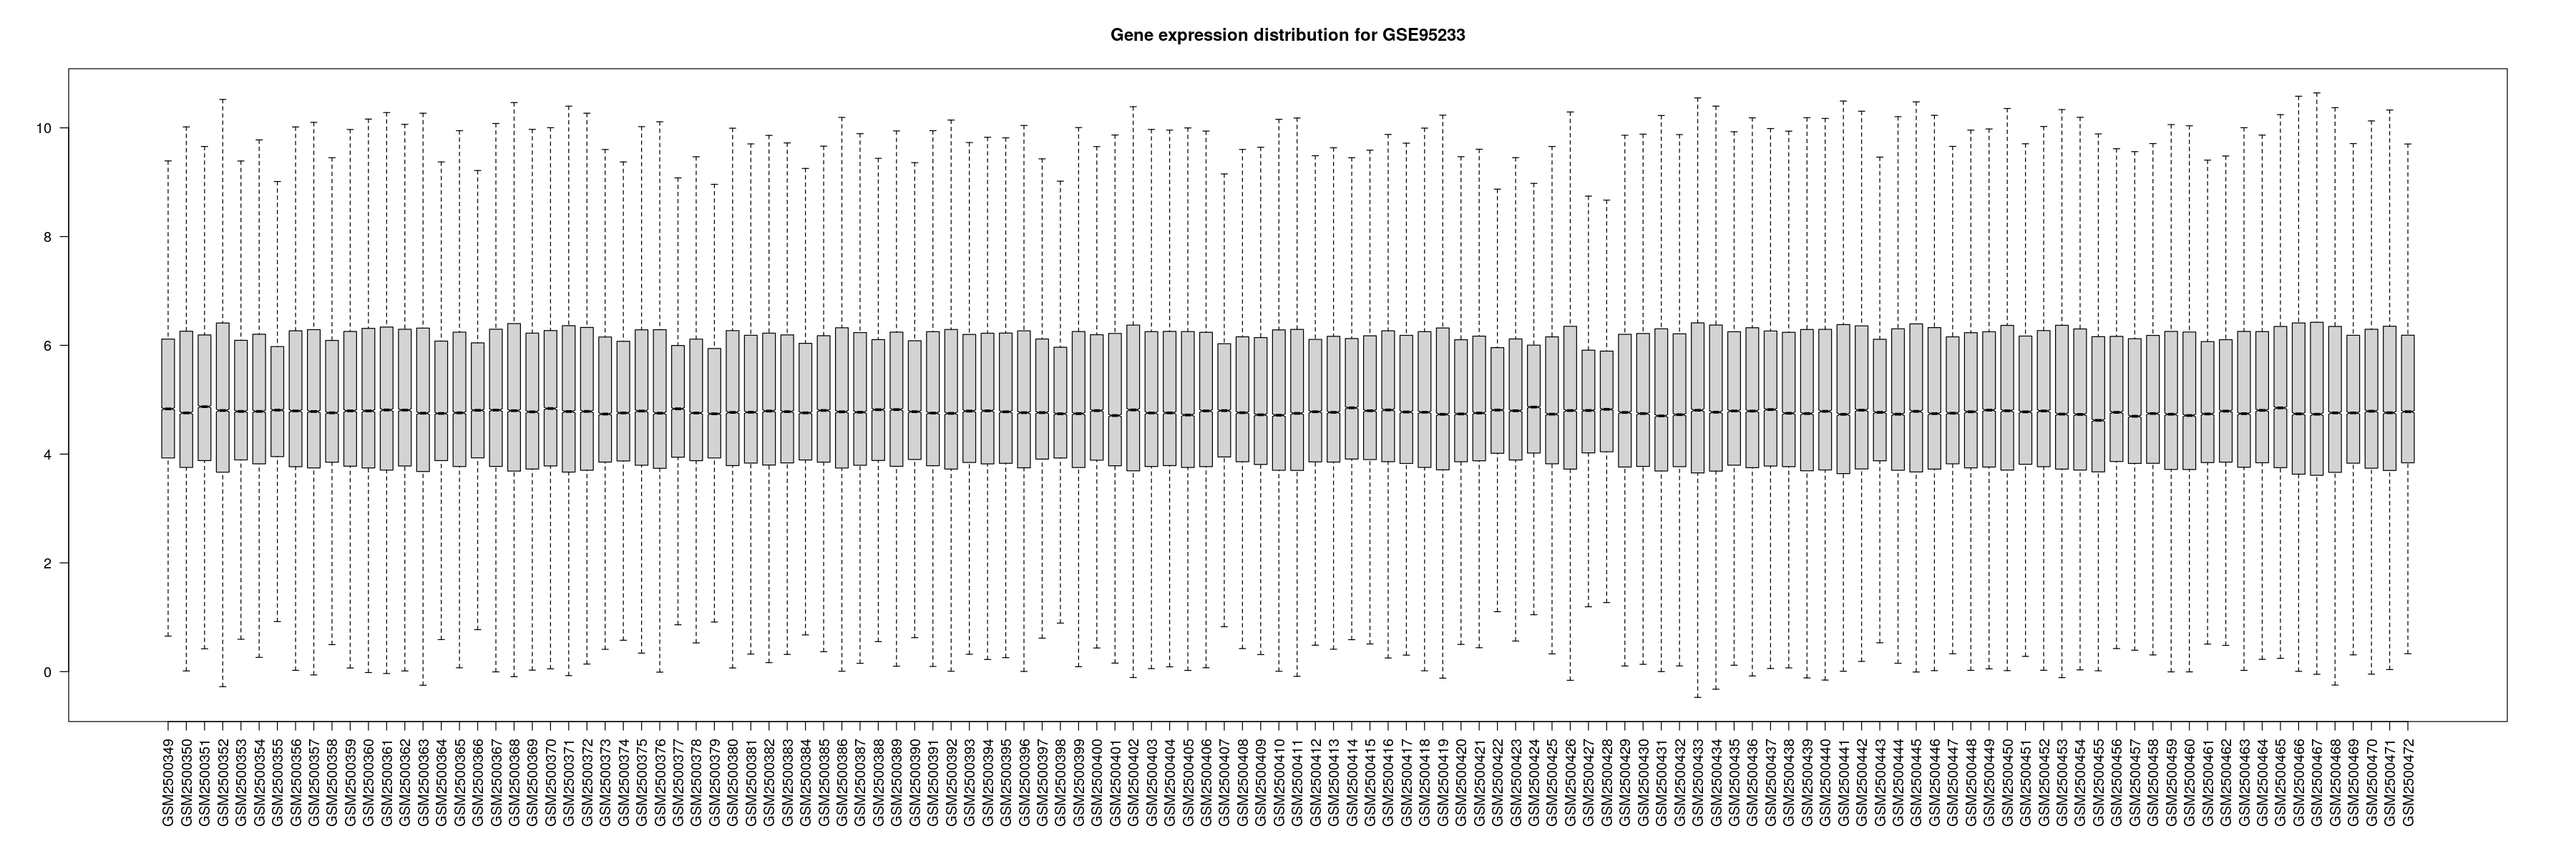

In [ ]:
options(repr.plot.width=30, repr.plot.height=10)
par(mar=c(8, 4, 4, 4))
boxplot(exprs(gse), boxwex=0.7, notch=T, main=sprintf('Gene expression distribution for %s', my_id), outline=FALSE, las=2)

Let us pick the sample chatacteristics that we can use the DE analysis. First, let us have a look at the columns that we have in `pData(gse)`.

In [ ]:
colnames(pData(gse))

[1] "title"                   "geo_accession"          
 [3] "status"                  "submission_date"        
 [5] "last_update_date"        "type"                   
 [7] "channel_count"           "source_name_ch1"        
 [9] "organism_ch1"            "characteristics_ch1"    
[11] "characteristics_ch1.1"   "characteristics_ch1.2"  
[13] "characteristics_ch1.3"   "molecule_ch1"           
[15] "extract_protocol_ch1"    "label_ch1"              
[17] "label_protocol_ch1"      "taxid_ch1"              
[19] "hyb_protocol"            "scan_protocol"          
[21] "description"             "data_processing"        
[23] "platform_id"             "contact_name"           
[25] "contact_email"           "contact_phone"          
[27] "contact_laboratory"      "contact_department"     
[29] "contact_institute"       "contact_address"        
[31] "contact_city"            "contact_zip/postal_code"
[33] "contact_country"         "supplementary_file"     
[35] "data_row_count"          "age:ch1"                
[37] "gender:ch1"              "survival:ch1"           
[39] "time point:ch1"

We are particularly interested in `'characteristics_ch1', 'characteristics_ch1.1', 'characteristics_ch1.2', 'characteristics_ch1.3'`.

In [ ]:
sample_factors <- c('characteristics_ch1', 'characteristics_ch1.1', 'characteristics_ch1.2', 'characteristics_ch1.3')
t(pData(gse)[,sample_factors])  # showing a wide version for convenience

,GSM2500349,GSM2500350,GSM2500351,GSM2500352,GSM2500353,GSM2500354,GSM2500355,GSM2500356,GSM2500357,GSM2500358,⋯,GSM2500463,GSM2500464,GSM2500465,GSM2500466,GSM2500467,GSM2500468,GSM2500469,GSM2500470,GSM2500471,GSM2500472
characteristics_ch1,gender: F,gender: F,gender: F,gender: F,gender: F,gender: F,gender: F,gender: F,gender: F,gender: F,⋯,gender: H,gender: H,gender: M,gender: M,gender: F,gender: F,gender: F,gender: F,gender: F,gender: F
characteristics_ch1.1,age: 52,age: 53,age: 52,age: 53,age: 76,age: 50,age: 57,age: 61,age: 51,age: 52,⋯,age: 72,age: 72,age: 46,age: 46,age: 78,age: 78,age: 53,age: 53,age: 54,age: 54
characteristics_ch1.2,time point: NA,time point: NA,time point: NA,time point: NA,time point: NA,time point: NA,time point: NA,time point: NA,time point: NA,time point: NA,⋯,time point: D01,time point: D03,time point: D01,time point: D03,time point: D01,time point: D02,time point: D01,time point: D03,time point: D01,time point: D03
characteristics_ch1.3,survival: NA,survival: NA,survival: NA,survival: NA,survival: NA,survival: NA,survival: NA,survival: NA,survival: NA,survival: NA,⋯,survival: Non Survivor,survival: Non Survivor,survival: Non Survivor,survival: Non Survivor,survival: Non Survivor,survival: Non Survivor,survival: Non Survivor,survival: Non Survivor,survival: Non Survivor,survival: Non Survivor


Let us rename columns for easier interpretation..

We also transform the values in these columns for better representation..

In [ ]:
names(pData(gse))[names(pData(gse)) == 'characteristics_ch1'] <- "gender"
names(pData(gse))[names(pData(gse)) == 'characteristics_ch1.1'] <- "age"
names(pData(gse))[names(pData(gse)) == 'characteristics_ch1.2'] <- "time.point"
names(pData(gse))[names(pData(gse)) == 'characteristics_ch1.3'] <- "survival"

pData(gse)['gender'] <- lapply(pData(gse)['gender'], function(x){
  str_replace(x, 'gender: ', '')
})  # Remove "gender: " substring
pData(gse)['age'] <- lapply(pData(gse)['age'], function(x){
  str_replace(x, 'age: ', '')
})  # Remove "age: " substring
pData(gse) <- transform(pData(gse), age=as.numeric(age))
pData(gse)['time.point'] <- lapply(pData(gse)['time.point'], function(x){
  str_replace(str_replace(x, 'time point: ', ''), 'NA', 'Control')
})  # Remove "time point: " substring
pData(gse)['survival'] <- lapply(pData(gse)['survival'], function(x){
  str_replace(str_replace(str_replace(x, 'survival: ', ''), ' ', '_'), 'NA', 'Control')
})  # Remove "survival: " substring


In [ ]:
main_factors <- c('gender', 'age', 'time.point', 'survival')
t(pData(gse)[,main_factors])  # showing a wide version for convenience

,GSM2500349,GSM2500350,GSM2500351,GSM2500352,GSM2500353,GSM2500354,GSM2500355,GSM2500356,GSM2500357,GSM2500358,⋯,GSM2500463,GSM2500464,GSM2500465,GSM2500466,GSM2500467,GSM2500468,GSM2500469,GSM2500470,GSM2500471,GSM2500472
gender,F,F,F,F,F,F,F,F,F,F,⋯,H,H,M,M,F,F,F,F,F,F
age,52,53,52,53,76,50,57,61,51,52,⋯,72,72,46,46,78,78,53,53,54,54
time.point,Control,Control,Control,Control,Control,Control,Control,Control,Control,Control,⋯,D01,D03,D01,D03,D01,D02,D01,D03,D01,D03
survival,Control,Control,Control,Control,Control,Control,Control,Control,Control,Control,⋯,Non_Survivor,Non_Survivor,Non_Survivor,Non_Survivor,Non_Survivor,Non_Survivor,Non_Survivor,Non_Survivor,Non_Survivor,Non_Survivor


Now we can do PCA/UMAP plots to group samples according to their gene expression..

### Plotting `gender` and `survival`.

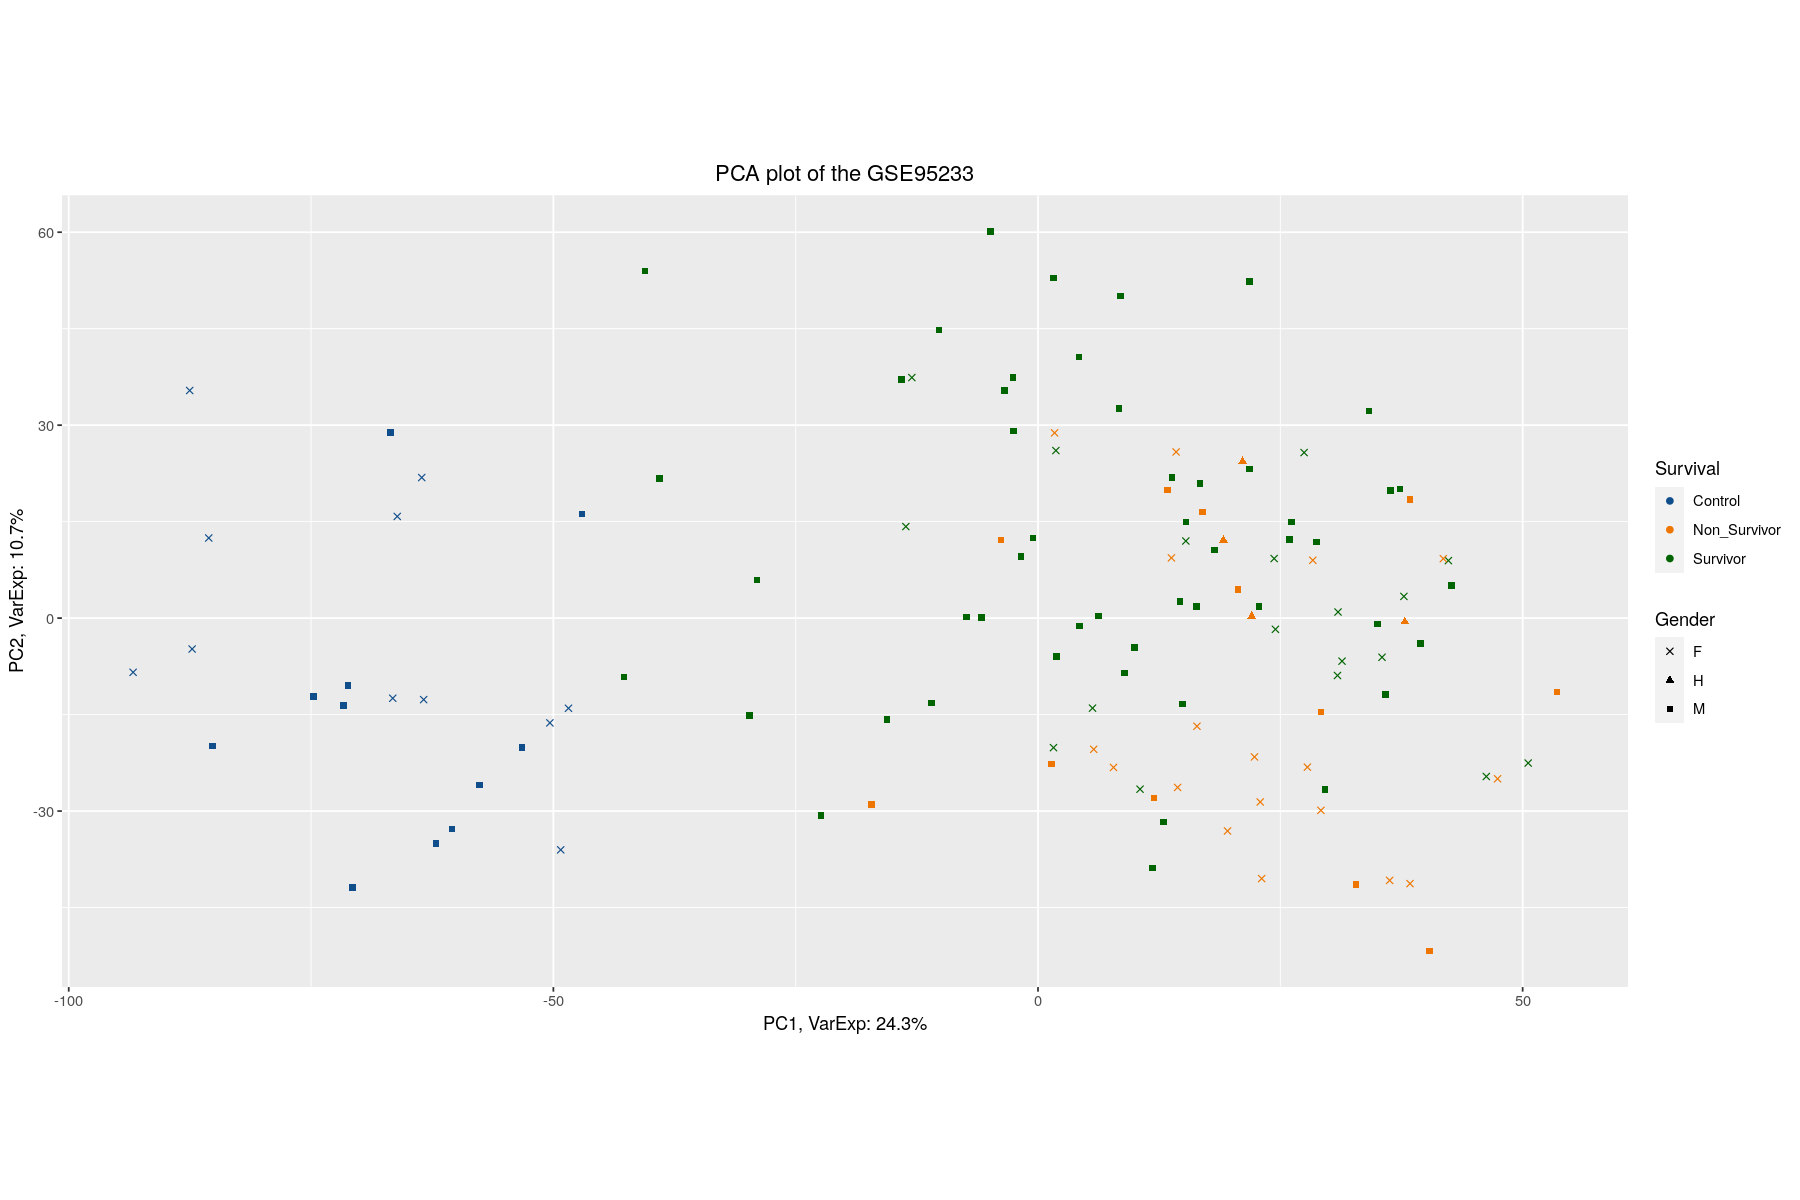

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)

exp <- Biobase::exprs(gse)
PCA <- prcomp(t(exp), scale = FALSE)

percentVar <- round(100*PCA$sdev^2/sum(PCA$sdev^2),1)
sd_ratio <- sqrt(percentVar[2] / percentVar[1])

dataGG <- data.frame(PC1 = PCA$x[,1], PC2 = PCA$x[,2],
                    Gender = pData(gse)$gender,
                    Survival = pData(gse)$survival)


ggplot(dataGG, aes(PC1, PC2)) +
      geom_point(aes(shape = Gender, colour = Survival)) +
  ggtitle(sprintf("PCA plot of the %s", my_id)) +
  xlab(paste0("PC1, VarExp: ", percentVar[1], "%")) +
  ylab(paste0("PC2, VarExp: ", percentVar[2], "%")) +
  theme(plot.title = element_text(hjust = 0.5)) +
  coord_fixed(ratio = sd_ratio) +
  scale_shape_manual(values = c(4, 17, 15)) + 
  scale_color_manual(values = c("dodgerblue4", "darkorange2", "darkgreen"))

We will plot UMAP on principal components computed above..

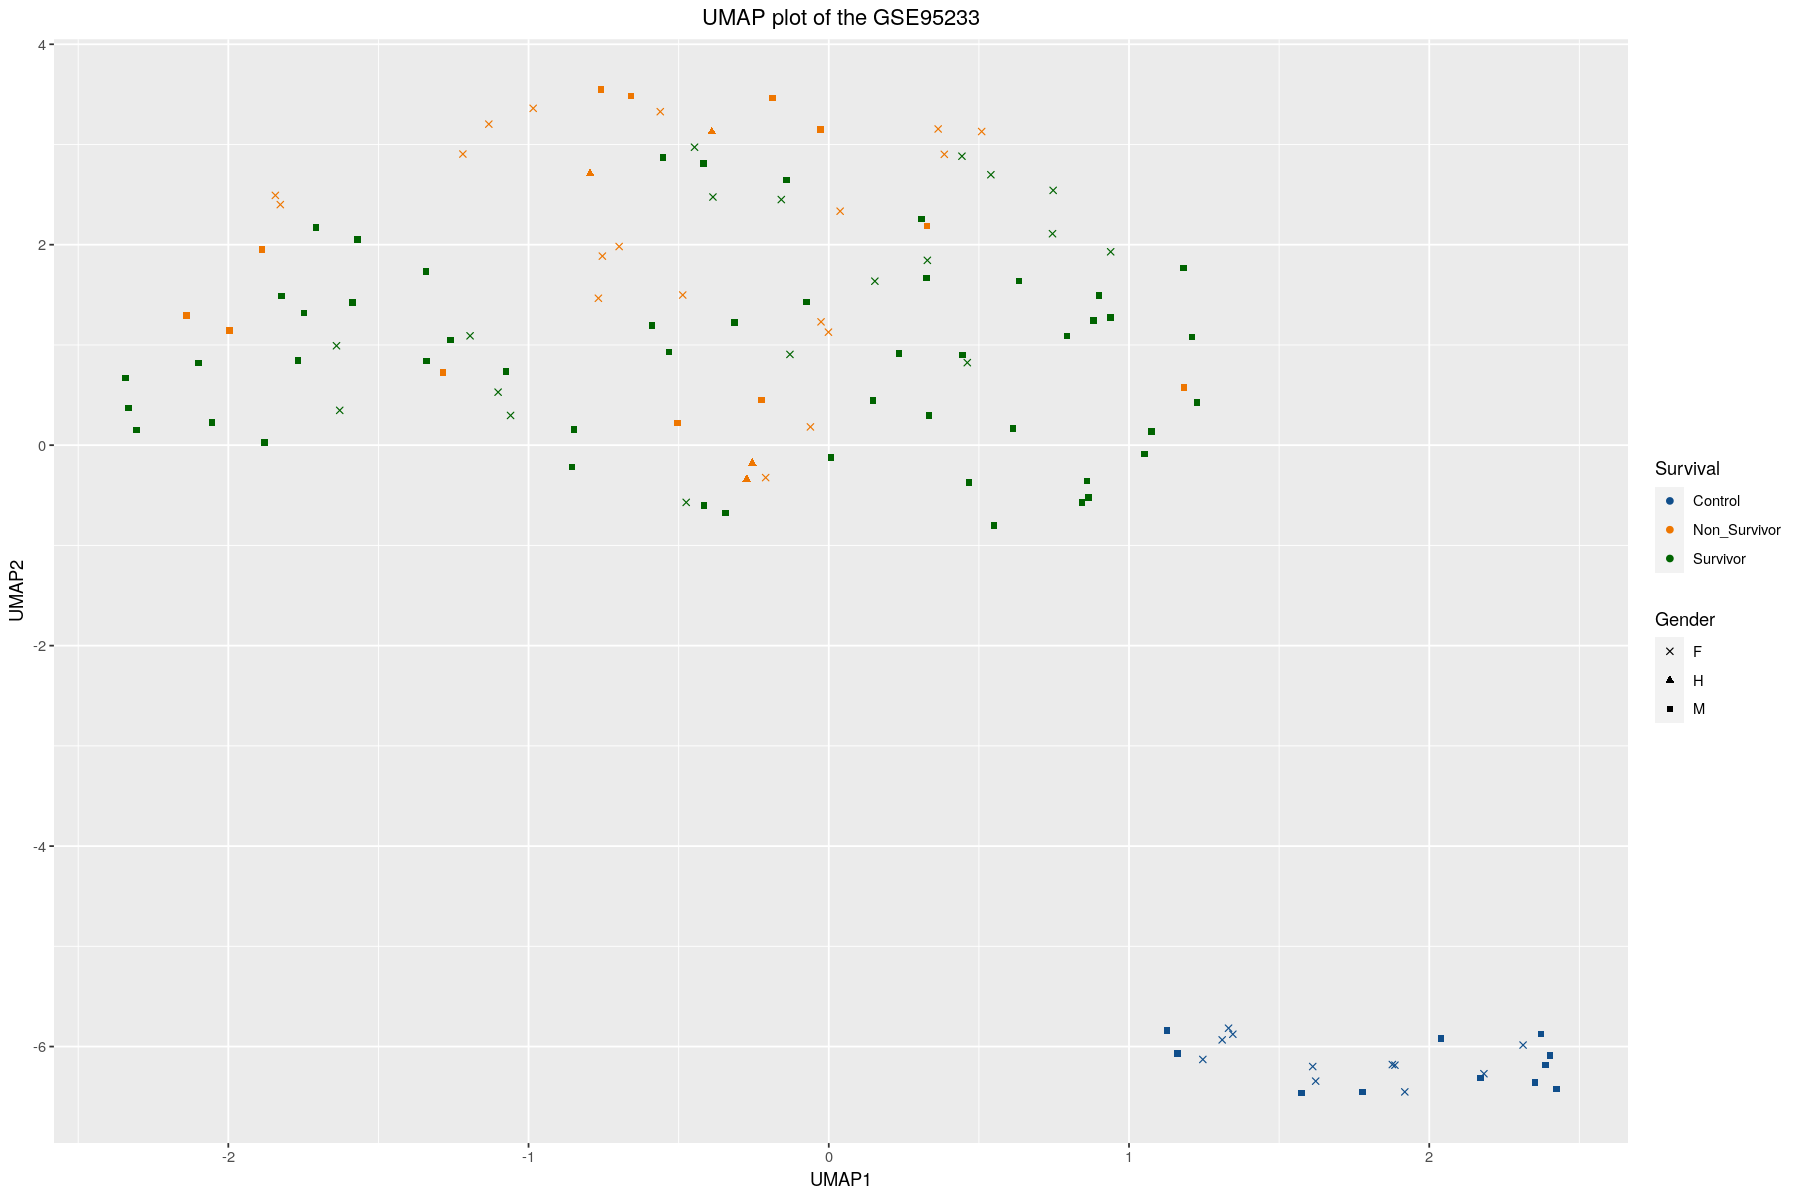

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)

UMAP = umap(PCA$x)

dataGG <- data.frame(UMAP1 = UMAP$layout[,1], UMAP2 = UMAP$layout[,2],
                     Gender = pData(gse)$gender,
                     Survival = pData(gse)$survival)


ggplot(dataGG, aes(UMAP1, UMAP2)) +
      geom_point(aes(shape = Gender, colour = Survival)) +
  ggtitle(sprintf("UMAP plot of the %s", my_id)) +
  xlab('UMAP1') +
  ylab("UMAP2") +
  theme(plot.title = element_text(hjust = 0.5)) +
  scale_shape_manual(values = c(4, 17, 15)) + 
  scale_color_manual(values = c("dodgerblue4", "darkorange2", "darkgreen"))

### Plotting `time.point` and `survival` variables..

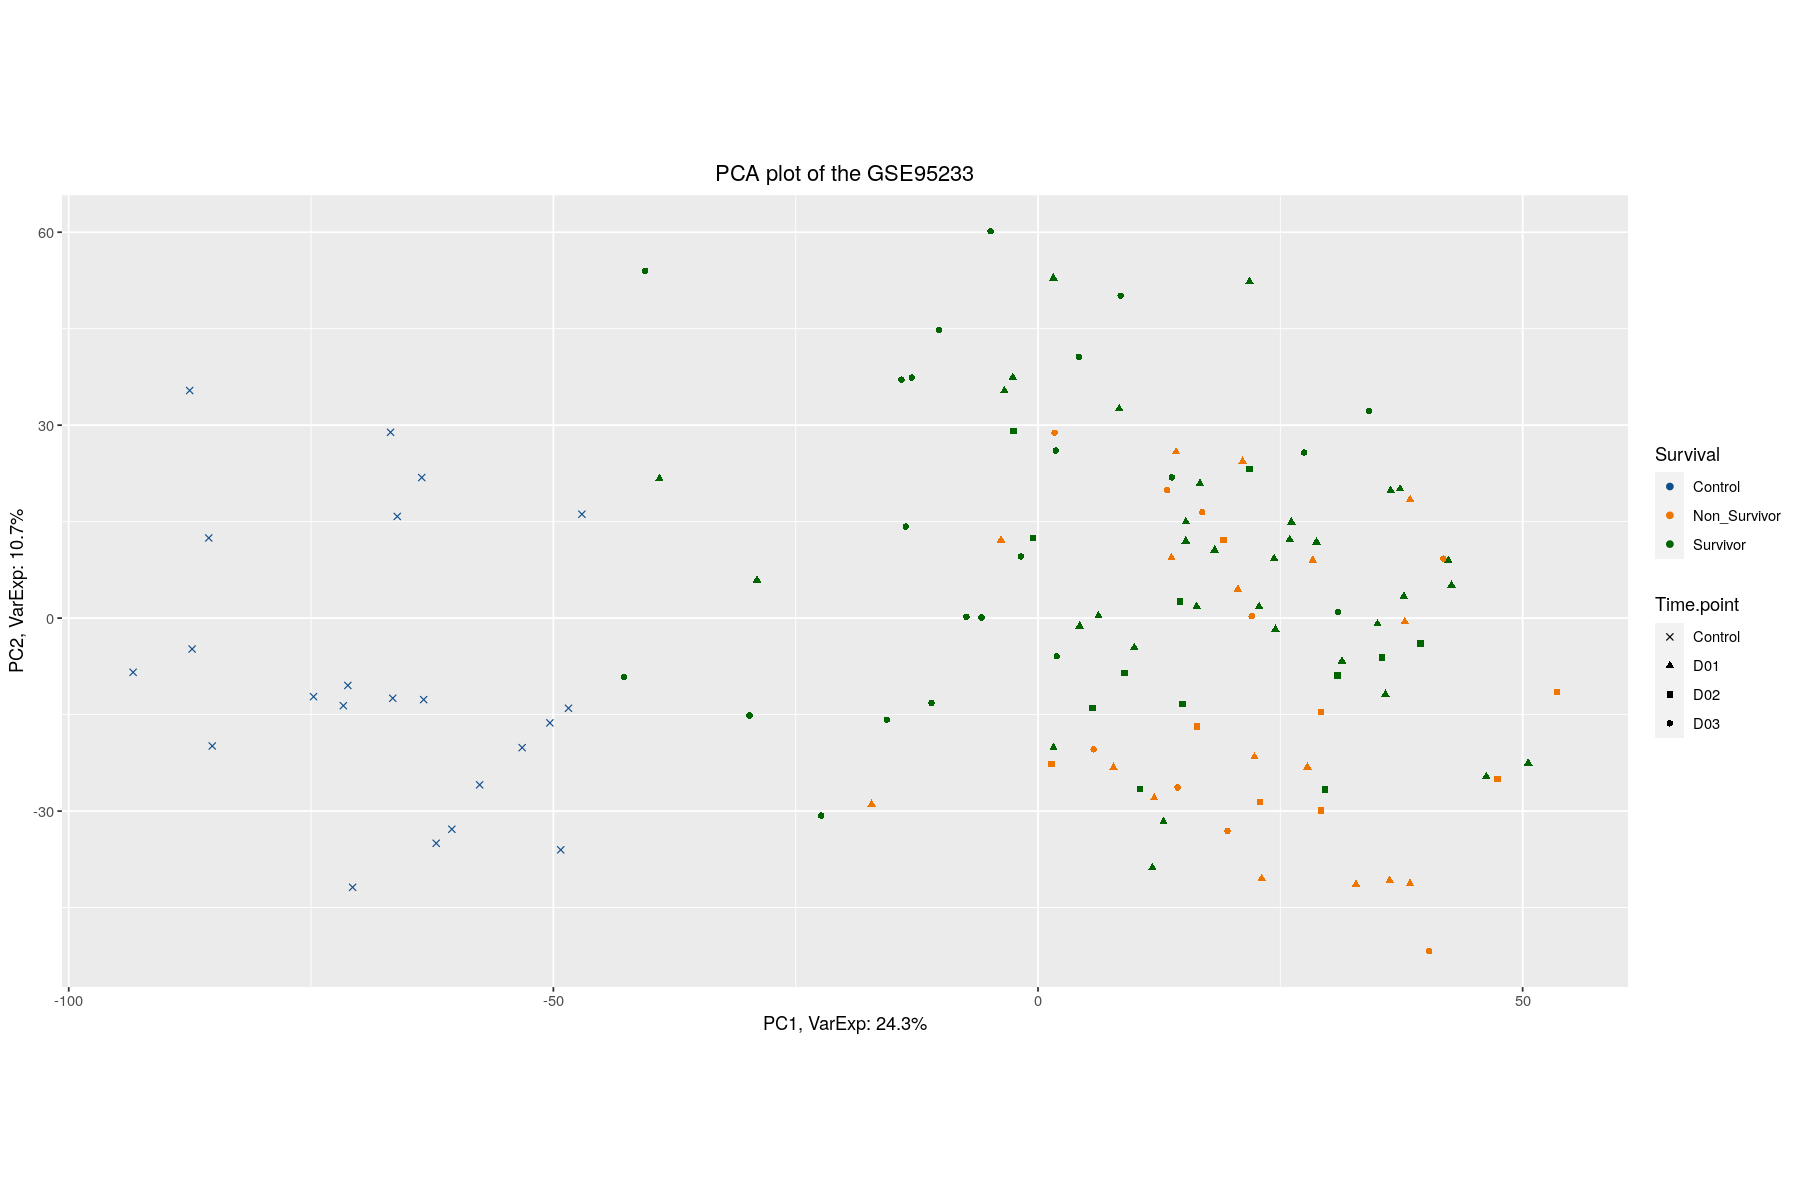

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)

exp <- Biobase::exprs(gse)
PCA <- prcomp(t(exp), scale = FALSE)

percentVar <- round(100*PCA$sdev^2/sum(PCA$sdev^2),1)
sd_ratio <- sqrt(percentVar[2] / percentVar[1])

dataGG <- data.frame(PC1 = PCA$x[,1], PC2 = PCA$x[,2],
                    Time.point = pData(gse)$time.point,
                    Survival = pData(gse)$survival)


ggplot(dataGG, aes(PC1, PC2)) +
      geom_point(aes(shape = Time.point, colour = Survival)) +
  ggtitle(sprintf("PCA plot of the %s", my_id)) +
  xlab(paste0("PC1, VarExp: ", percentVar[1], "%")) +
  ylab(paste0("PC2, VarExp: ", percentVar[2], "%")) +
  theme(plot.title = element_text(hjust = 0.5)) +
  coord_fixed(ratio = sd_ratio) +
  scale_shape_manual(values = c(4, 17, 15, 16)) + 
  scale_color_manual(values = c("dodgerblue4", "darkorange2", "darkgreen"))

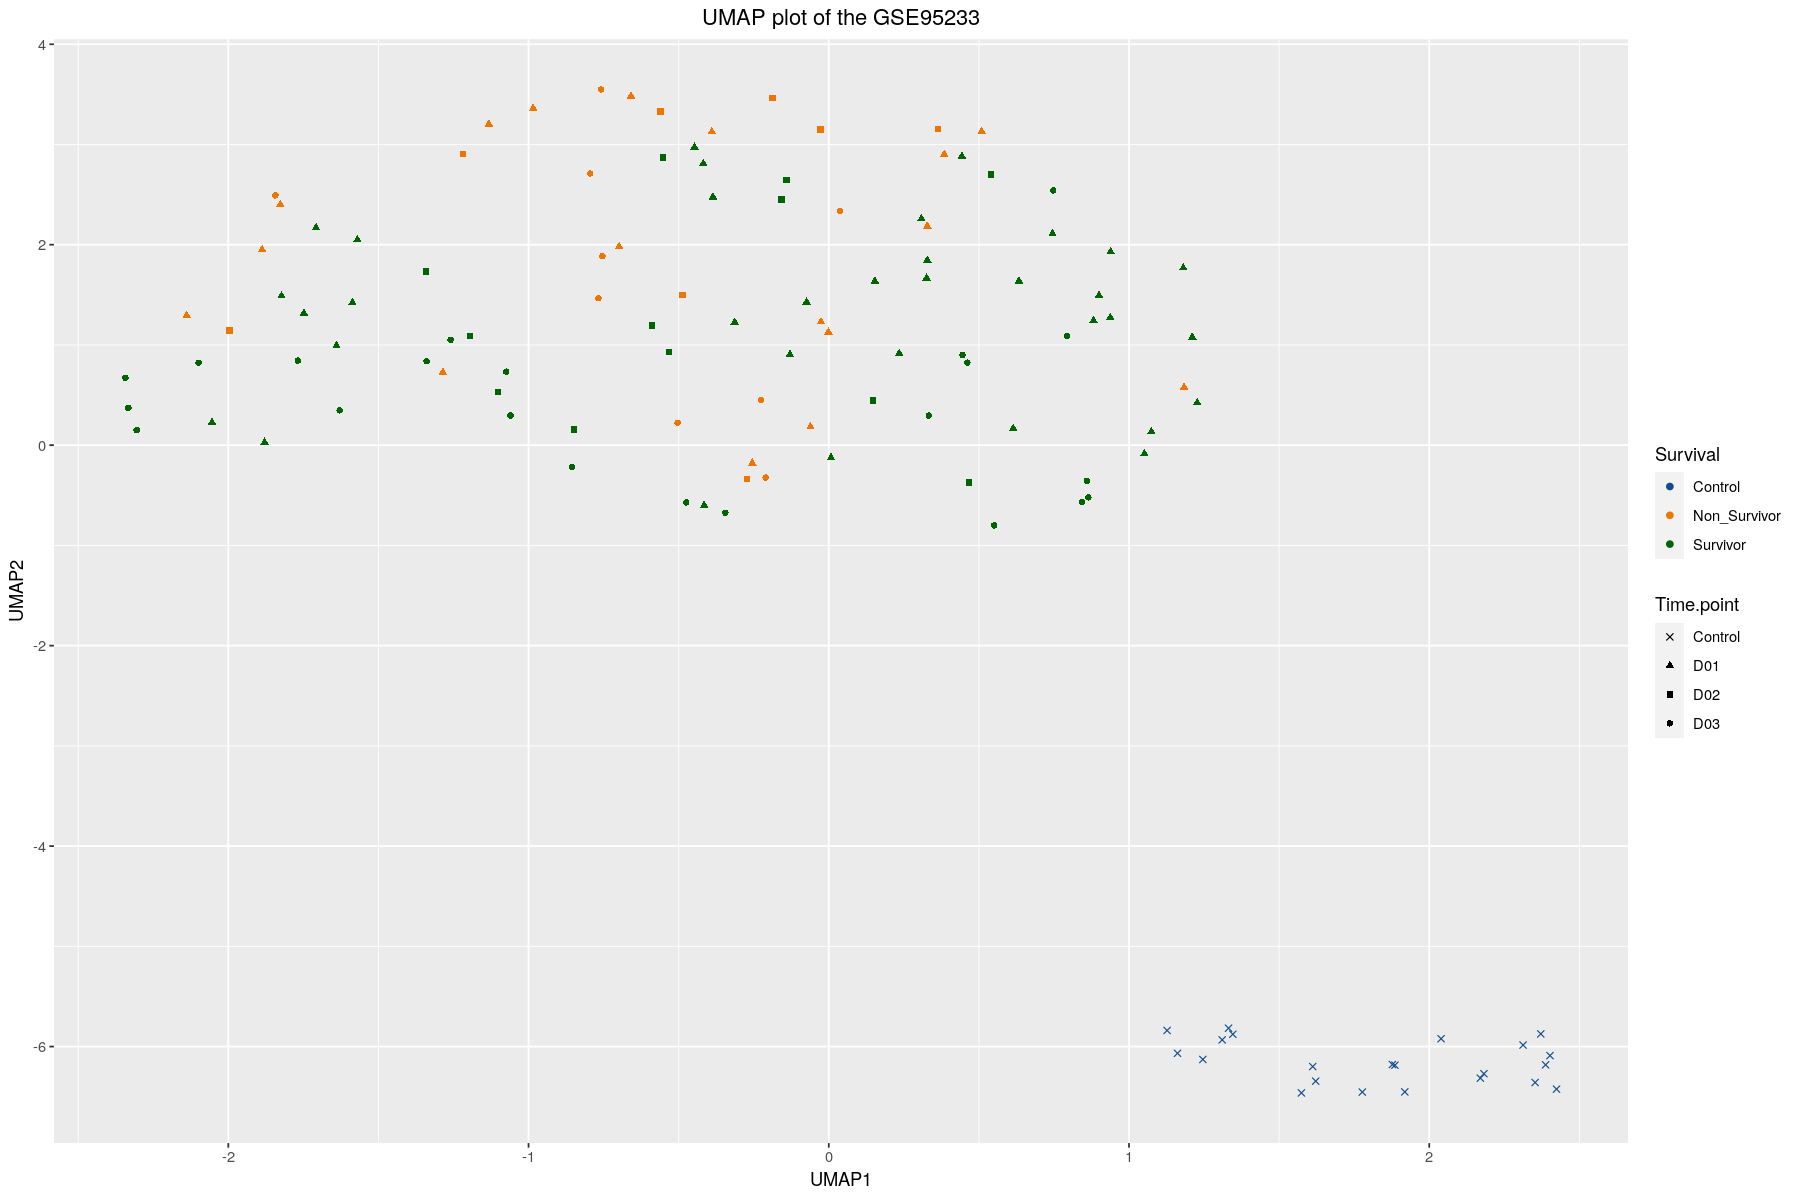

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)

UMAP = umap(PCA$x)

dataGG <- data.frame(UMAP1 = UMAP$layout[,1], UMAP2 = UMAP$layout[,2],
                     Time.point = pData(gse)$time.point,
                     Survival = pData(gse)$survival)


ggplot(dataGG, aes(UMAP1, UMAP2)) +
      geom_point(aes(shape = Time.point, colour = Survival)) +
  ggtitle(sprintf("UMAP plot of the %s", my_id)) +
  xlab('UMAP1') +
  ylab("UMAP2") +
  theme(plot.title = element_text(hjust = 0.5)) +
  scale_shape_manual(values = c(4, 17, 15, 16)) + 
  scale_color_manual(values = c("dodgerblue4", "darkorange2", "darkgreen"))

### Only sepsis patients

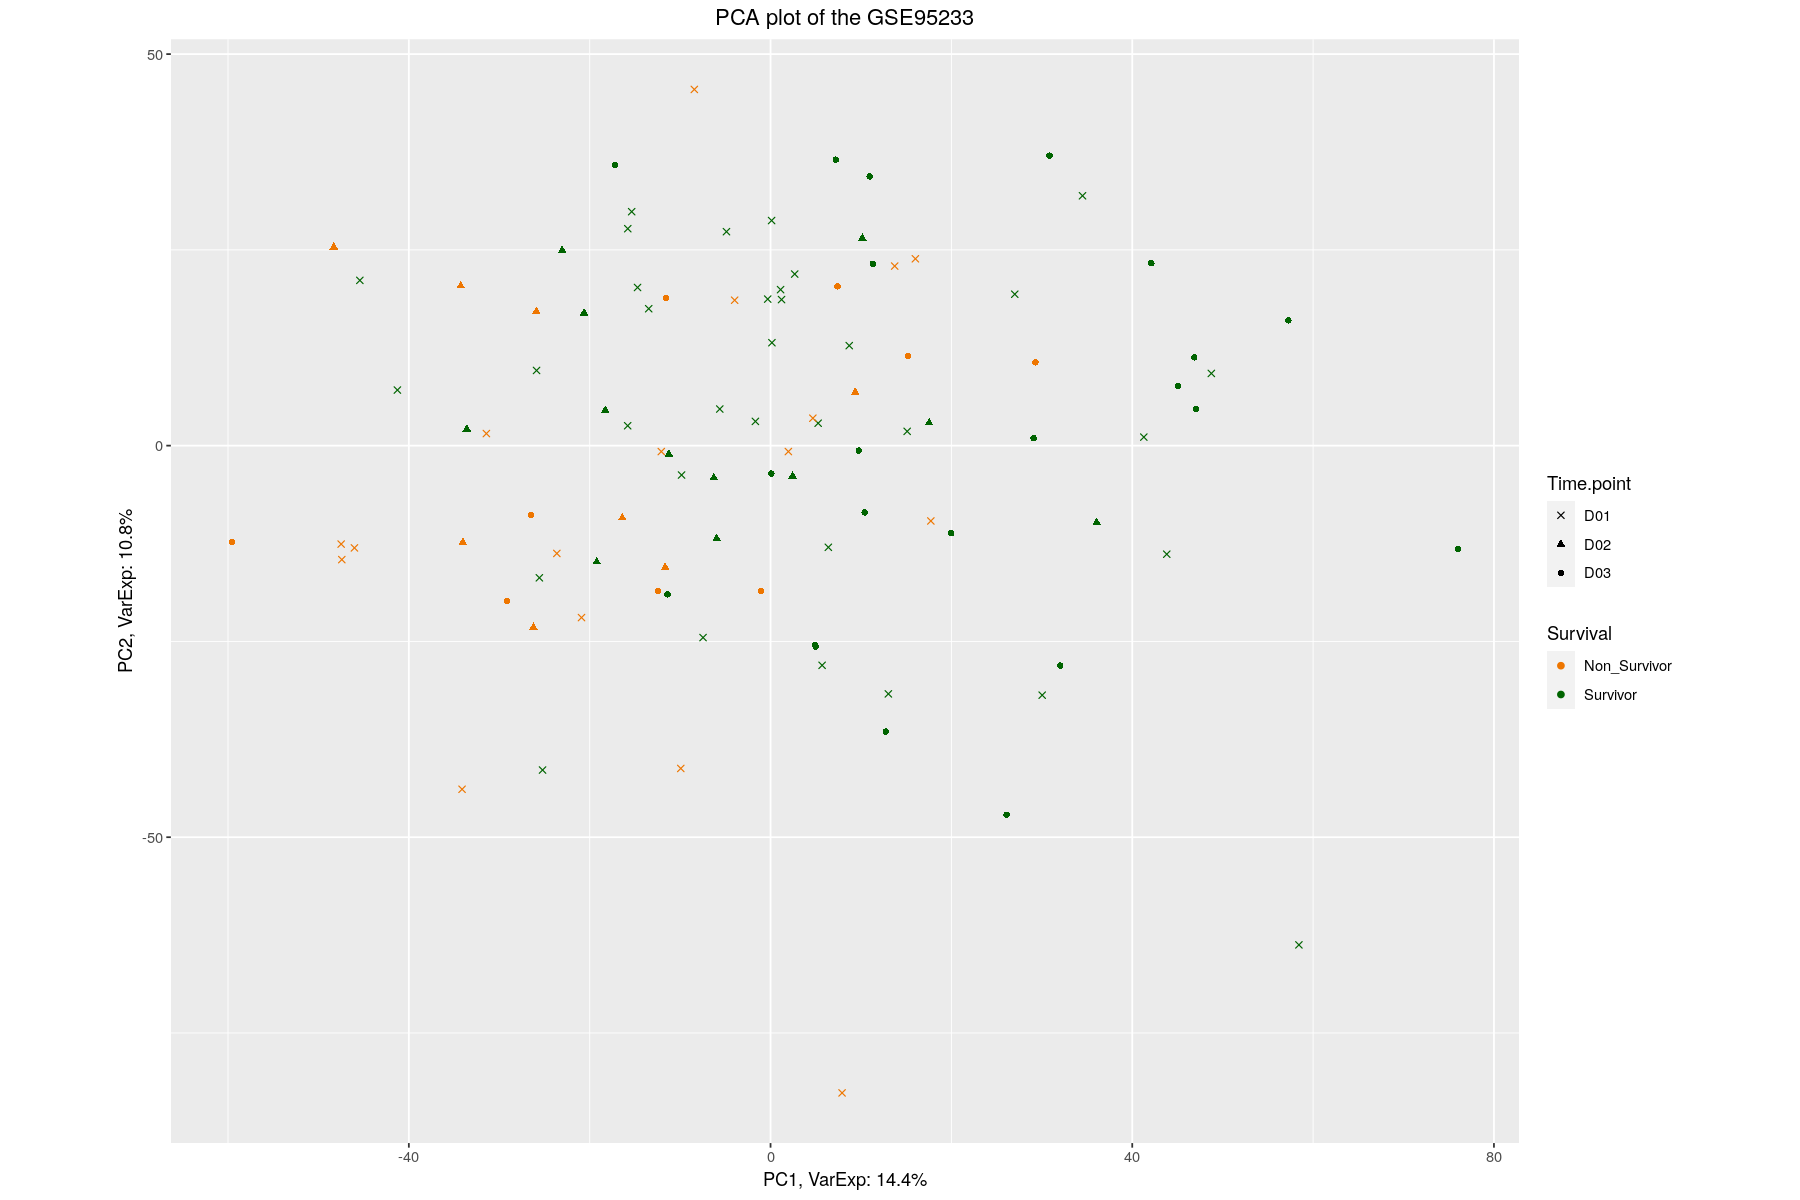

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)

exp <- Biobase::exprs(gse)[,pData(gse)$survival != 'Control']
anno <- pData(gse)[pData(gse)$survival != 'Control',]
PCA <- prcomp(t(exp), scale = FALSE)

percentVar <- round(100*PCA$sdev^2/sum(PCA$sdev^2),1)
sd_ratio <- sqrt(percentVar[2] / percentVar[1])

dataGG <- data.frame(PC1 = PCA$x[,1], PC2 = PCA$x[,2],
                    Time.point = anno$time.point,
                    Survival = anno$survival)


ggplot(dataGG, aes(PC1, PC2)) +
      geom_point(aes(shape = Time.point, colour = Survival)) +
  ggtitle(sprintf("PCA plot of the %s", my_id)) +
  xlab(paste0("PC1, VarExp: ", percentVar[1], "%")) +
  ylab(paste0("PC2, VarExp: ", percentVar[2], "%")) +
  theme(plot.title = element_text(hjust = 0.5)) +
  coord_fixed(ratio = sd_ratio) +
  scale_shape_manual(values = c(4, 17, 16)) + 
  scale_color_manual(values = c("darkorange2", "darkgreen"))

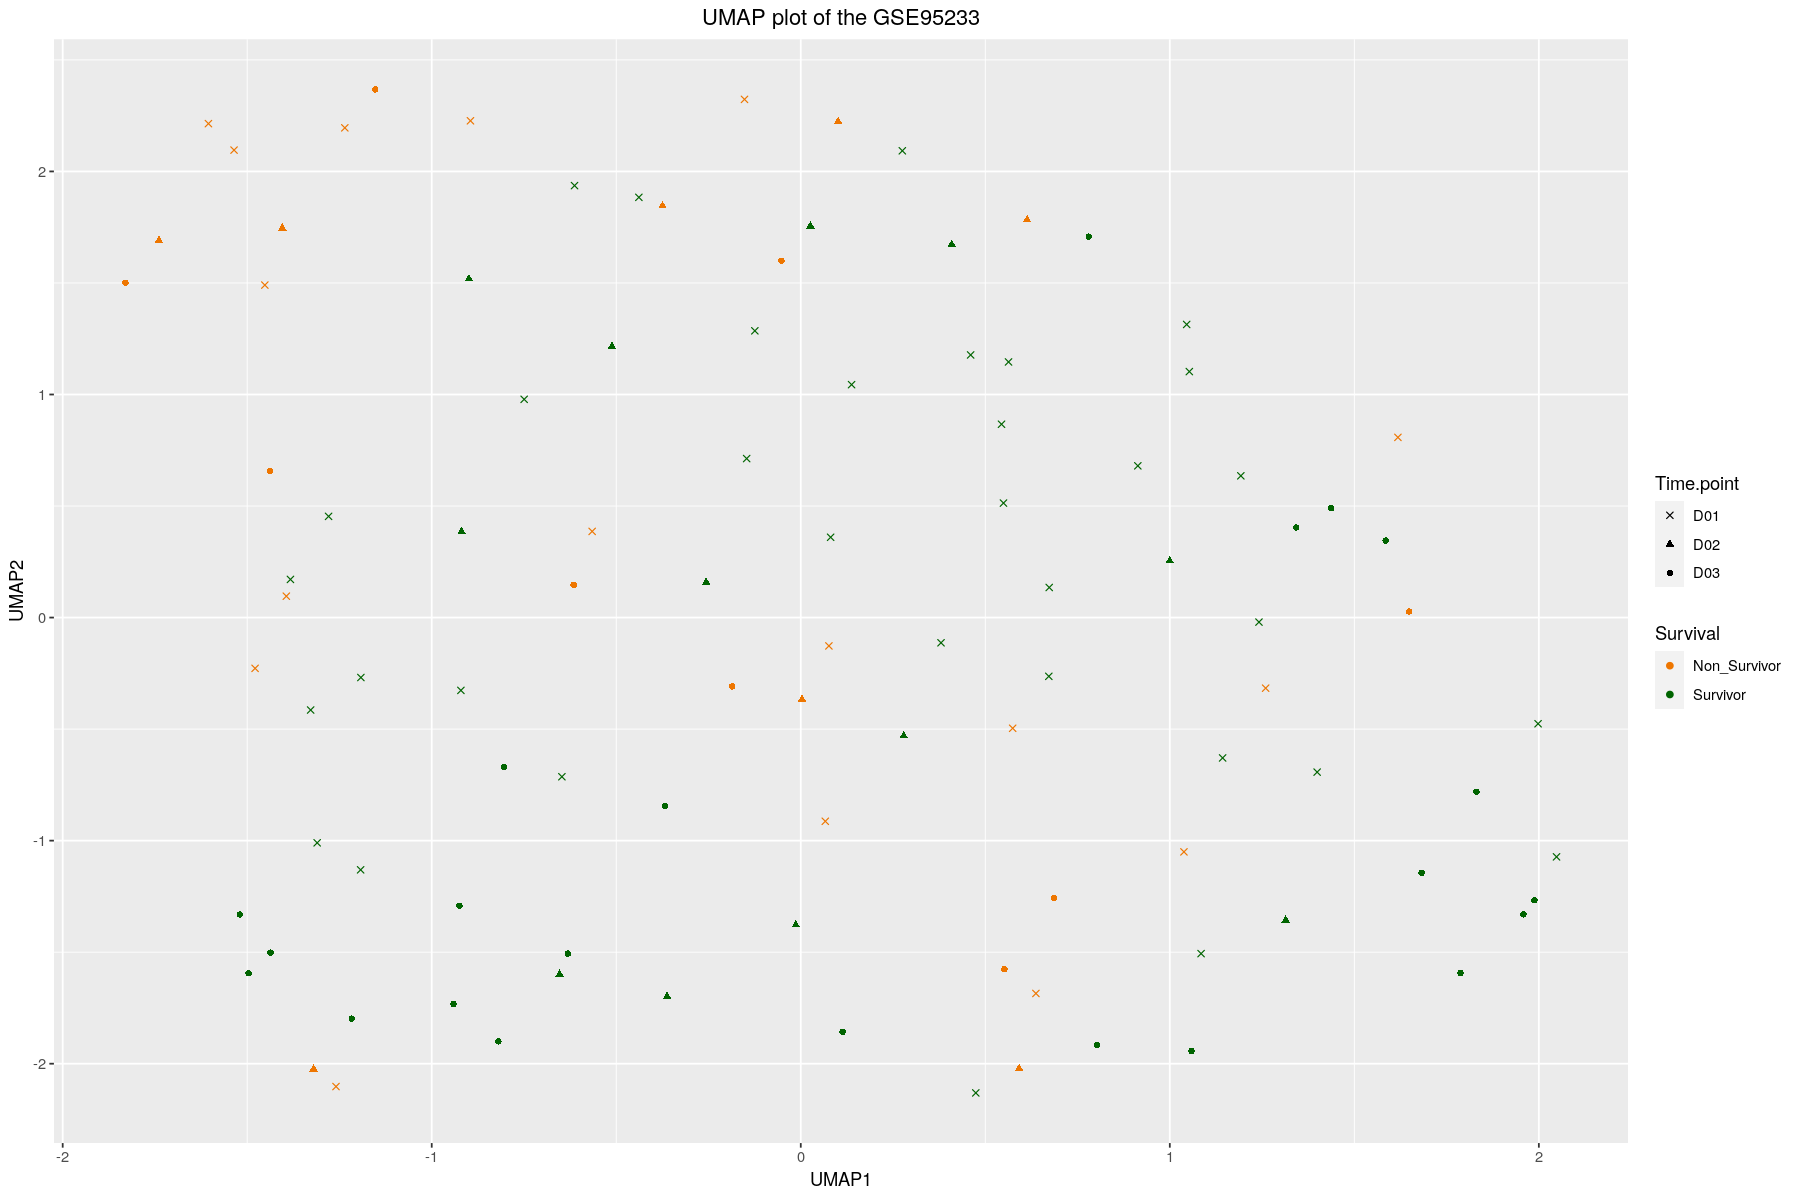

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)

UMAP = umap(PCA$x)

dataGG <- data.frame(UMAP1 = UMAP$layout[,1], UMAP2 = UMAP$layout[,2],
                     Time.point = anno$time.point,
                    Survival = anno$survival)


ggplot(dataGG, aes(UMAP1, UMAP2)) +
      geom_point(aes(shape = Time.point, colour = Survival)) +
  ggtitle(sprintf("UMAP plot of the %s", my_id)) +
  xlab('UMAP1') +
  ylab("UMAP2") +
  theme(plot.title = element_text(hjust = 0.5)) +
  scale_shape_manual(values = c(4, 17, 16)) + 
  scale_color_manual(values = c("darkorange2", "darkgreen"))

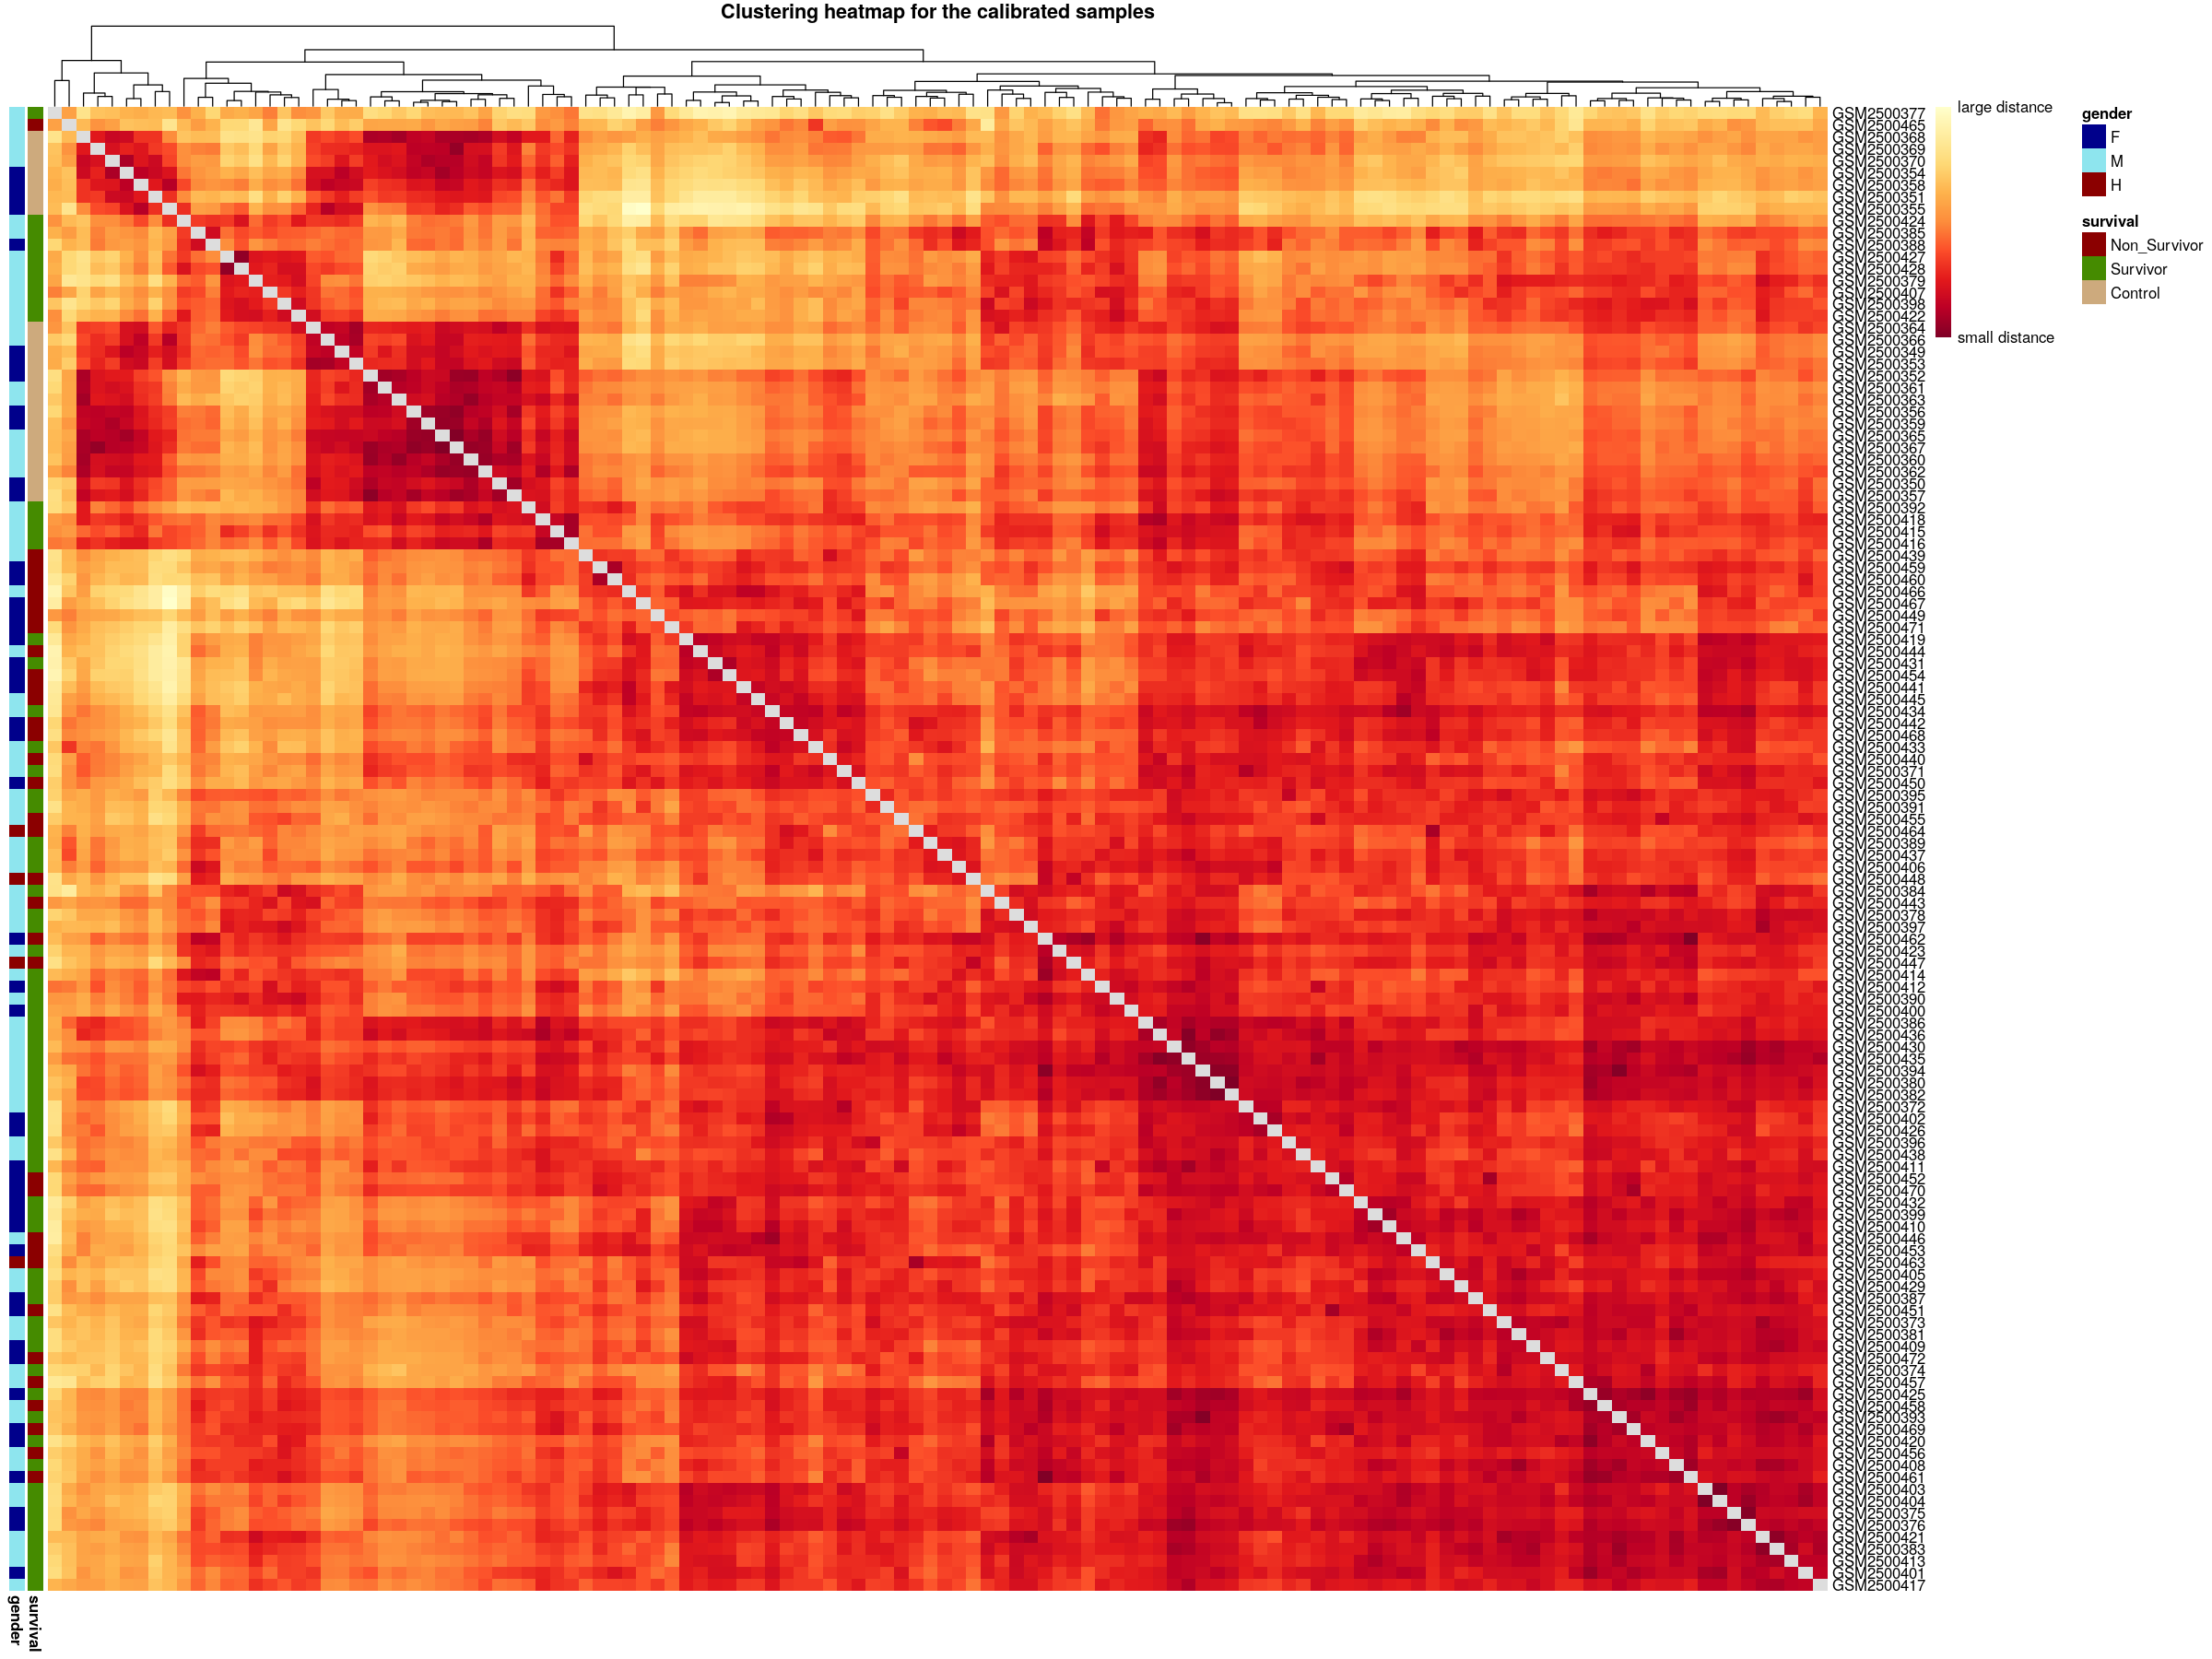

In [ ]:
options(repr.plot.width=20, repr.plot.height=15)

dists <- as.matrix(dist(t(exprs(gse)), method = "manhattan"))

rownames(dists) <- row.names(pData(gse))
hmcol <- rev(colorRampPalette(RColorBrewer::brewer.pal(9, "YlOrRd"))(255))
colnames(dists) <- NULL
diag(dists) <- NA

ann_colors <- list(
  survival = c(Non_Survivor = "red4", Survivor = "chartreuse4", Control="burlywood3"),
  gender = c(F = "blue4", M = "cadetblue2", H='red4')
                   )
pheatmap(dists, col = (hmcol), 
         annotation_row = pData(gse)[, c('survival', 'gender')],
         annotation_colors = ann_colors,
         legend = TRUE, 
         treeheight_row = 0,
         legend_breaks = c(min(dists, na.rm = TRUE), 
                         max(dists, na.rm = TRUE)), 
         legend_labels = (c("small distance", "large distance")),
         main = "Clustering heatmap for the calibrated samples")

We can observe that we can group control and sepsis patients - they have different expression patterns..

Now let us perform DE analysis using `limma`. We will start by creating a simple design matrix comparing control and sepsis patients.

### DE analysis

#### Control vs Sepsis

In [ ]:
design <- data.frame(
  Control=ifelse(pData(gse)$survival == 'Control', 1, 0),
  Sepsis=ifelse(pData(gse)$survival == 'Control', 0, 1)
)
rownames(design) <- pData(gse)$geo_accession
design

,Control,Sepsis
,<dbl>,<dbl>
GSM2500349,1,0
GSM2500350,1,0
GSM2500351,1,0
GSM2500352,1,0
GSM2500353,1,0
GSM2500354,1,0
GSM2500355,1,0
GSM2500356,1,0
GSM2500357,1,0


Now we should make the contrast between Control and Sepsis.




In [ ]:
fit <- lmFit(gse, design)
cont.matrix <- makeContrasts(ControlvsSepsis=Control-Sepsis, levels=design)
fit2 <- contrasts.fit(fit, cont.matrix)
fit2 <- eBayes(fit2)
head(topTable(fit2, adjust="BH", number = Inf)[,c('Gene.Symbol', 'logFC', 'AveExpr', 't', 'P.Value', 'adj.P.Val', 'B')])

,Gene.Symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
214370_at,S100A8,-2.379741,12.389484,-29.39781,1.324751e-58,4.058638e-54,122.7199
205863_at,S100A12,-3.430511,11.903669,-28.64384,2.353919e-57,3.605851e-53,119.9033
203535_at,S100A9,-2.171086,12.344730,-28.33720,7.708397e-57,7.872072e-53,118.7412
202917_s_at,S100A8,-2.185016,12.888141,-28.23613,1.141965e-56,8.746596e-53,118.3560
202298_at,NDUFA1,-2.329416,9.364731,-24.64550,2.649980e-50,1.623749e-46,103.9530
216609_at,TXN,-2.265691,10.292548,-24.03038,3.764129e-49,1.922027e-45,101.3382


Getting upregulated and downregulated genes via volcano plot

If the ddCt has a negative value, then the gene we are interest in is upregulated, this is because the fold change will be larger than 1. But if the ddCt has a positive value, then the gene we are interested in is downregulated and the fold change is <1

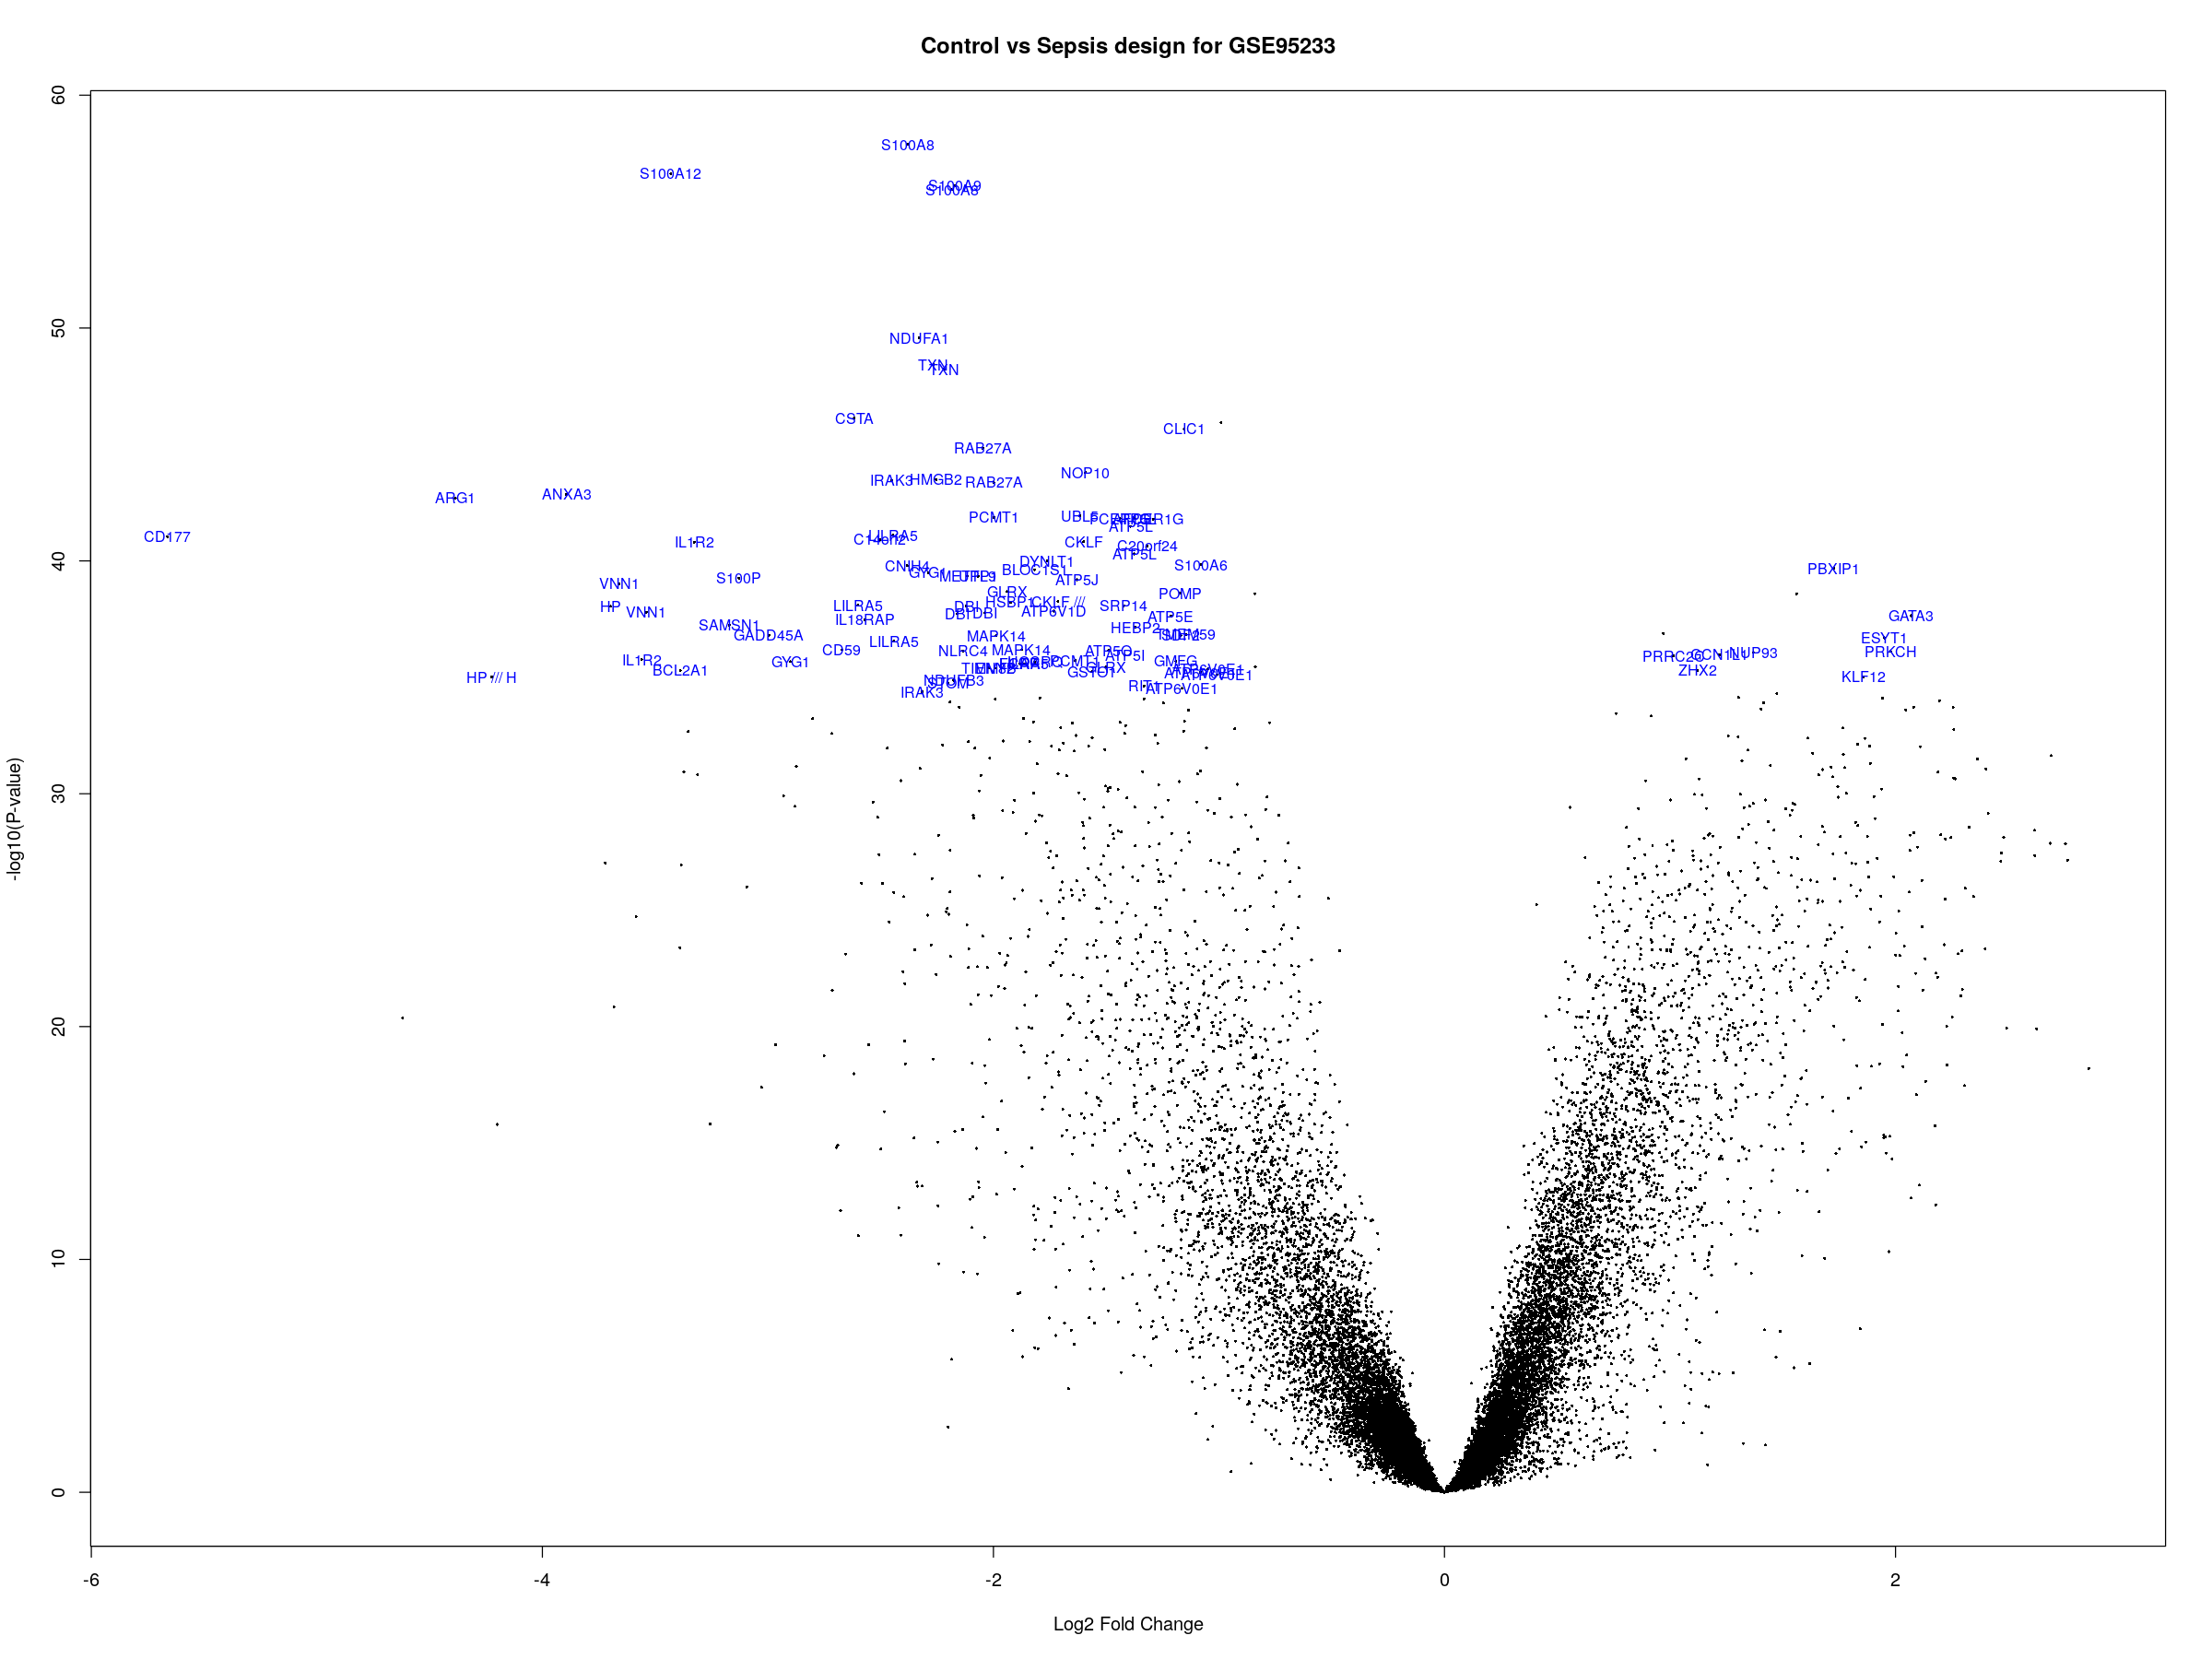

In [ ]:
volcano_names <- ifelse(abs(fit2$coefficients)>=1, fit2$genes$`Gene Symbol`, NA)
             
             
volcanoplot(fit2, coef = 1L, style = "p-value", highlight = 100, 
            names = volcano_names, main=sprintf('Control vs Sepsis design for %s', my_id),
            xlab = "Log2 Fold Change", ylab = NULL, pch=16, cex=0.35)

#### Control vs Non-survival vs Survival

In [ ]:
f <- factor(pData(gse)$survival, levels=c("Control","Non_Survivor","Survivor"))
design <- model.matrix(~0+f)
colnames(design) <- c("Control","Non_Survivor","Survivor")

In [ ]:
fit <- lmFit(gse, design)
contrast.matrix <- makeContrasts(Control-Non_Survivor, Non_Survivor-Survivor, Survivor-Control,
                                 levels=design)
fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)
results <- decideTests(fit2)

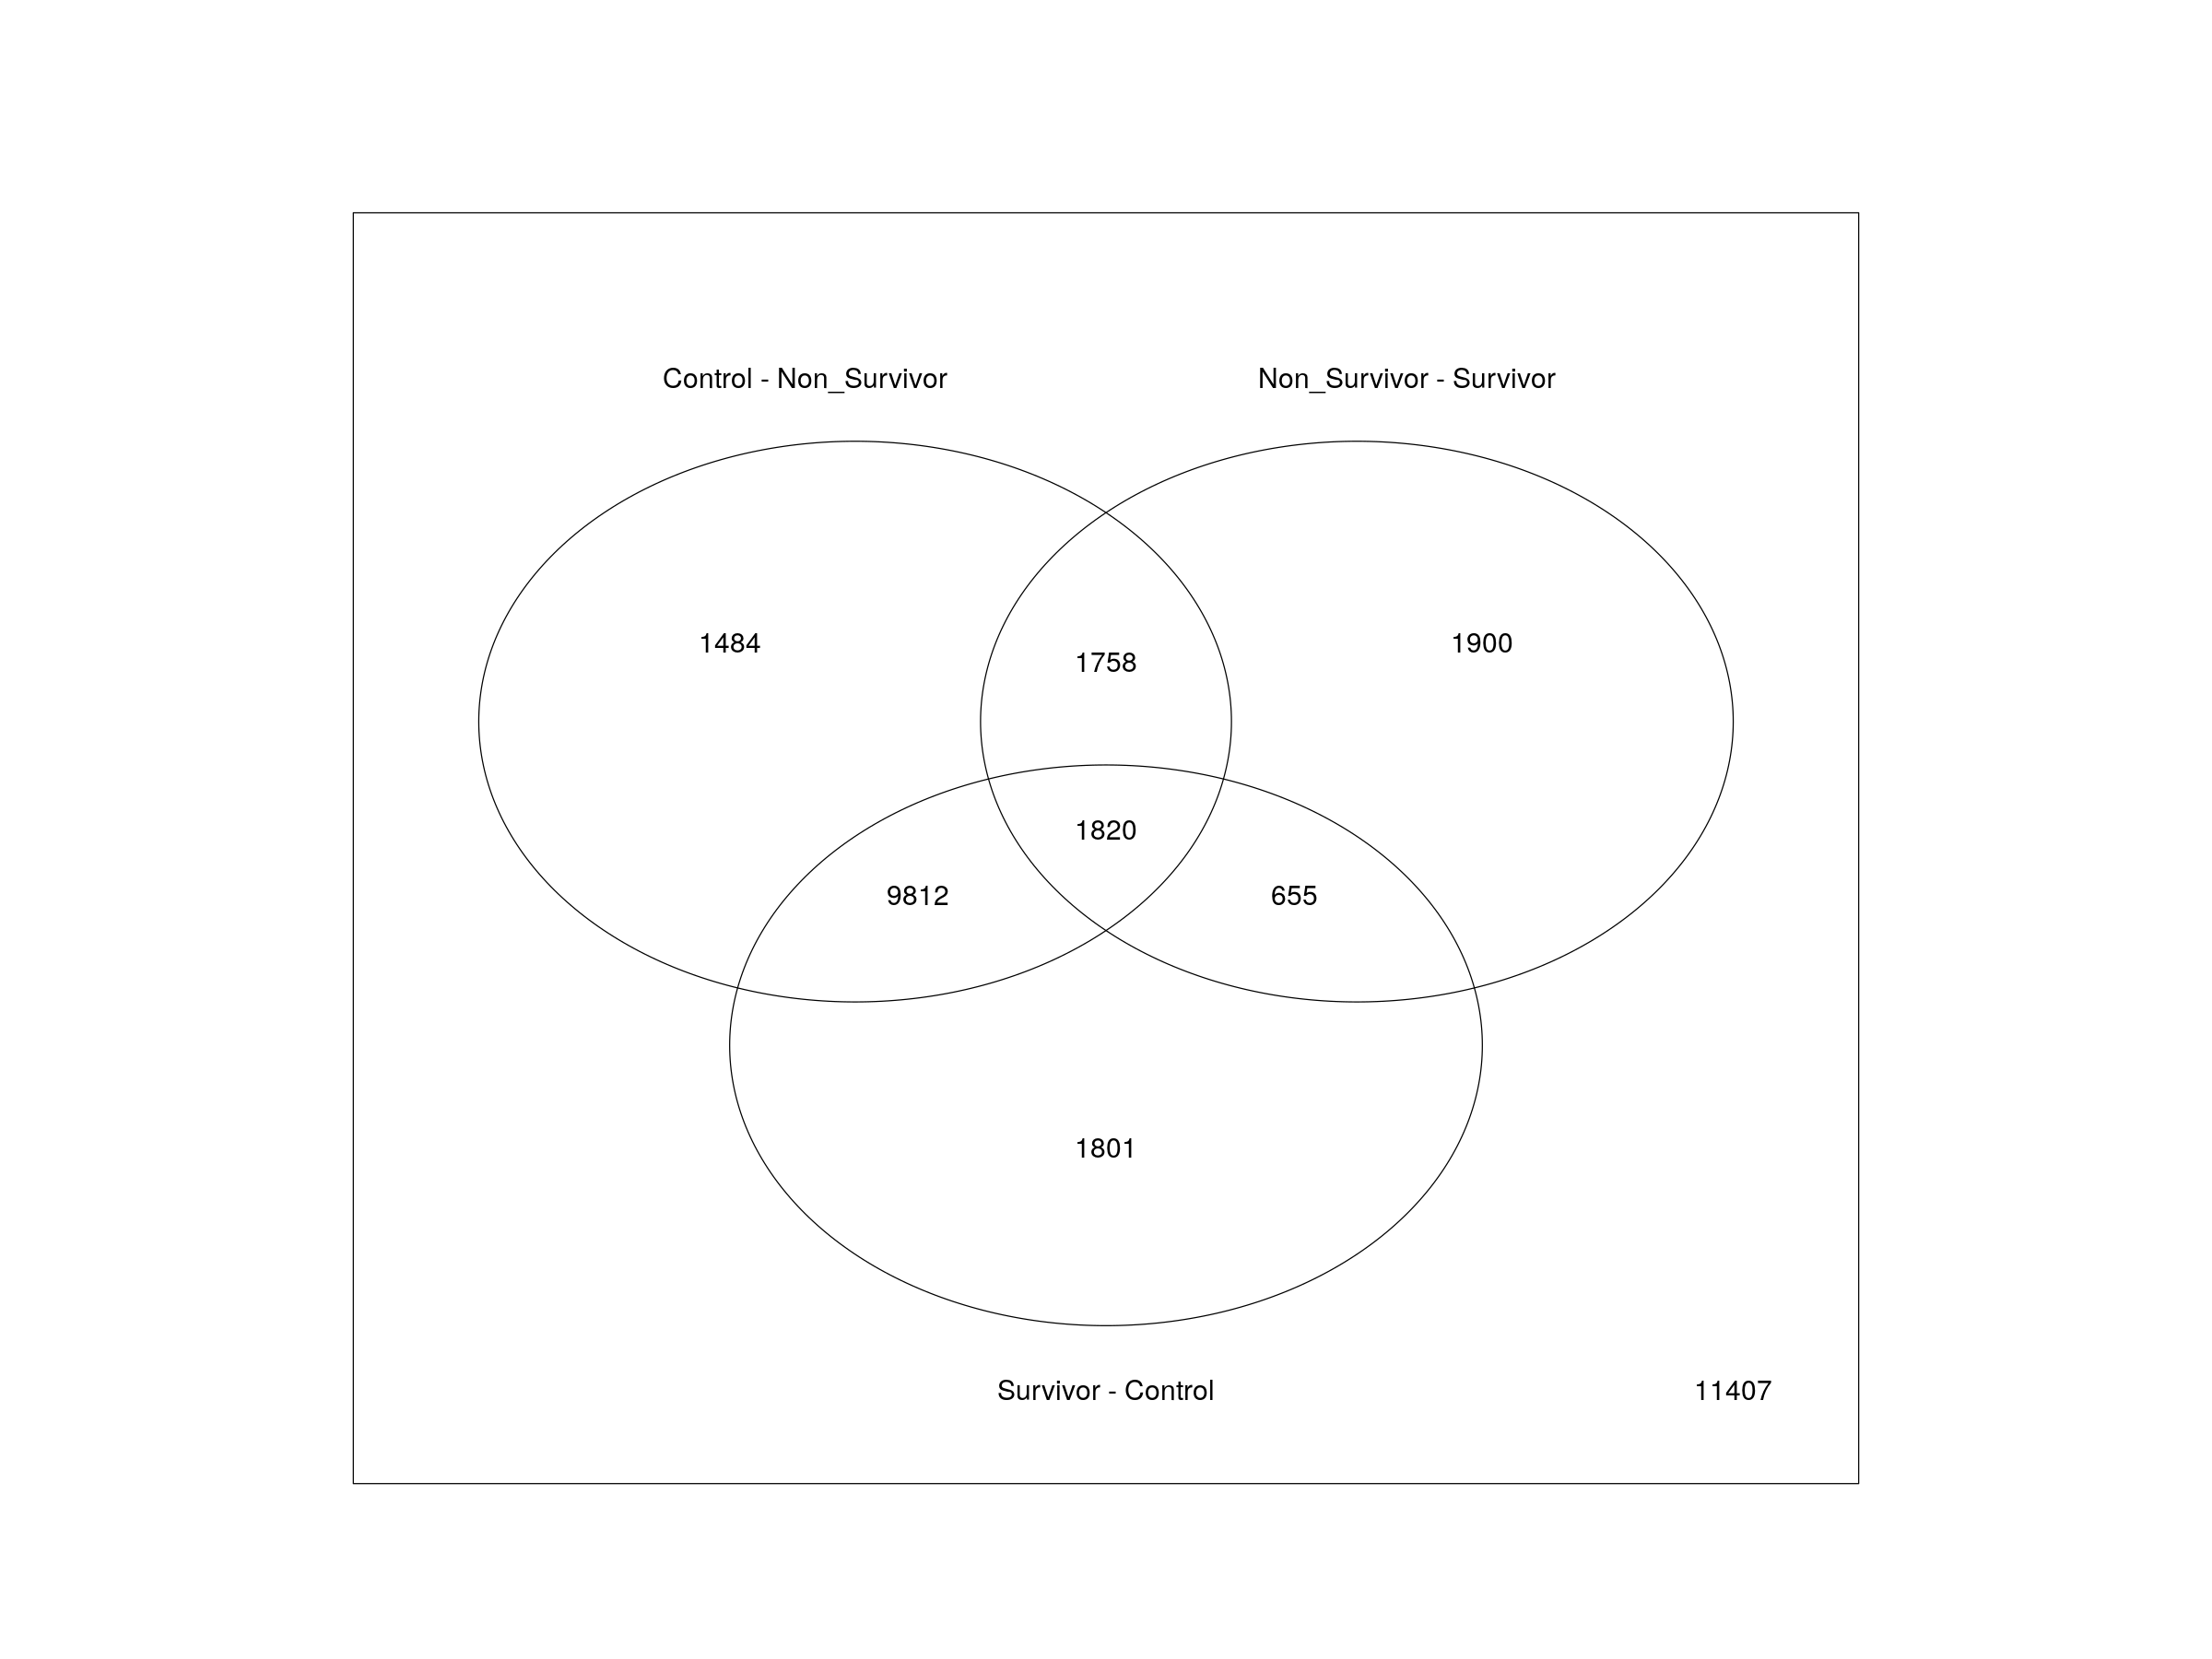

In [ ]:
vennDiagram(results)

Genes that vary between all 3 groups:

In [ ]:
topTable(fit2, number=10)[,c('Gene.Symbol', 'AveExpr', 'P.Value', 'adj.P.Val', 'F')]

,Gene.Symbol,AveExpr,P.Value,adj.P.Val,F
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
214370_at,S100A8,12.389484,1.651535e-57,5.059809e-53,437.1296
203535_at,S100A9,12.344730,3.272611e-56,3.304587e-52,414.0335
202917_s_at,S100A8,12.888141,3.702276e-56,3.304587e-52,413.1027
205863_at,S100A12,11.903669,4.314505e-56,3.304587e-52,411.9506
202298_at,NDUFA1,9.364731,5.320734e-51,3.260227e-47,331.4982
208864_s_at,TXN,9.856243,1.599691e-50,8.168291e-47,324.6822
216609_at,TXN,10.292548,3.374837e-50,1.477070e-46,320.1267
204971_at,CSTA,11.295369,4.843084e-47,1.854720e-43,278.4738
212082_s_at,MYL6,12.762795,2.208353e-46,7.517480e-43,270.3676


Now we will produce DE results for each pair of contrast (overall 3).

```
coef=1 --->  Control vs Non-Survivor
coef=2 --->  Non-Survivor vs Survivor
coef=3 --->  Survivor vs Control
```

DE expression in **Control-Non_Survivor** comparsion:

In [ ]:
head(topTable(fit2, coef=1, number=Inf)[,c('Gene.Symbol', 'logFC', 'AveExpr', 't', 'P.Value', 'adj.P.Val', 'B')])

,Gene.Symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
214370_at,S100A8,-2.448844,12.389484,-26.10913,9.339614e-53,2.861378e-48,109.37382
202917_s_at,S100A8,-2.284022,12.888141,-25.73909,4.272932e-52,4.954101e-48,107.88458
203535_at,S100A9,-2.263430,12.344730,-25.70837,4.851096e-52,4.954101e-48,107.76026
205863_at,S100A12,-3.510954,11.903669,-25.21877,3.718394e-51,2.848011e-47,105.76413
208864_s_at,TXN,-2.420671,9.856243,-23.60835,3.653059e-48,1.958710e-44,99.00023
202298_at,NDUFA1,-2.504530,9.364731,-23.59717,3.835970e-48,1.958710e-44,98.95221


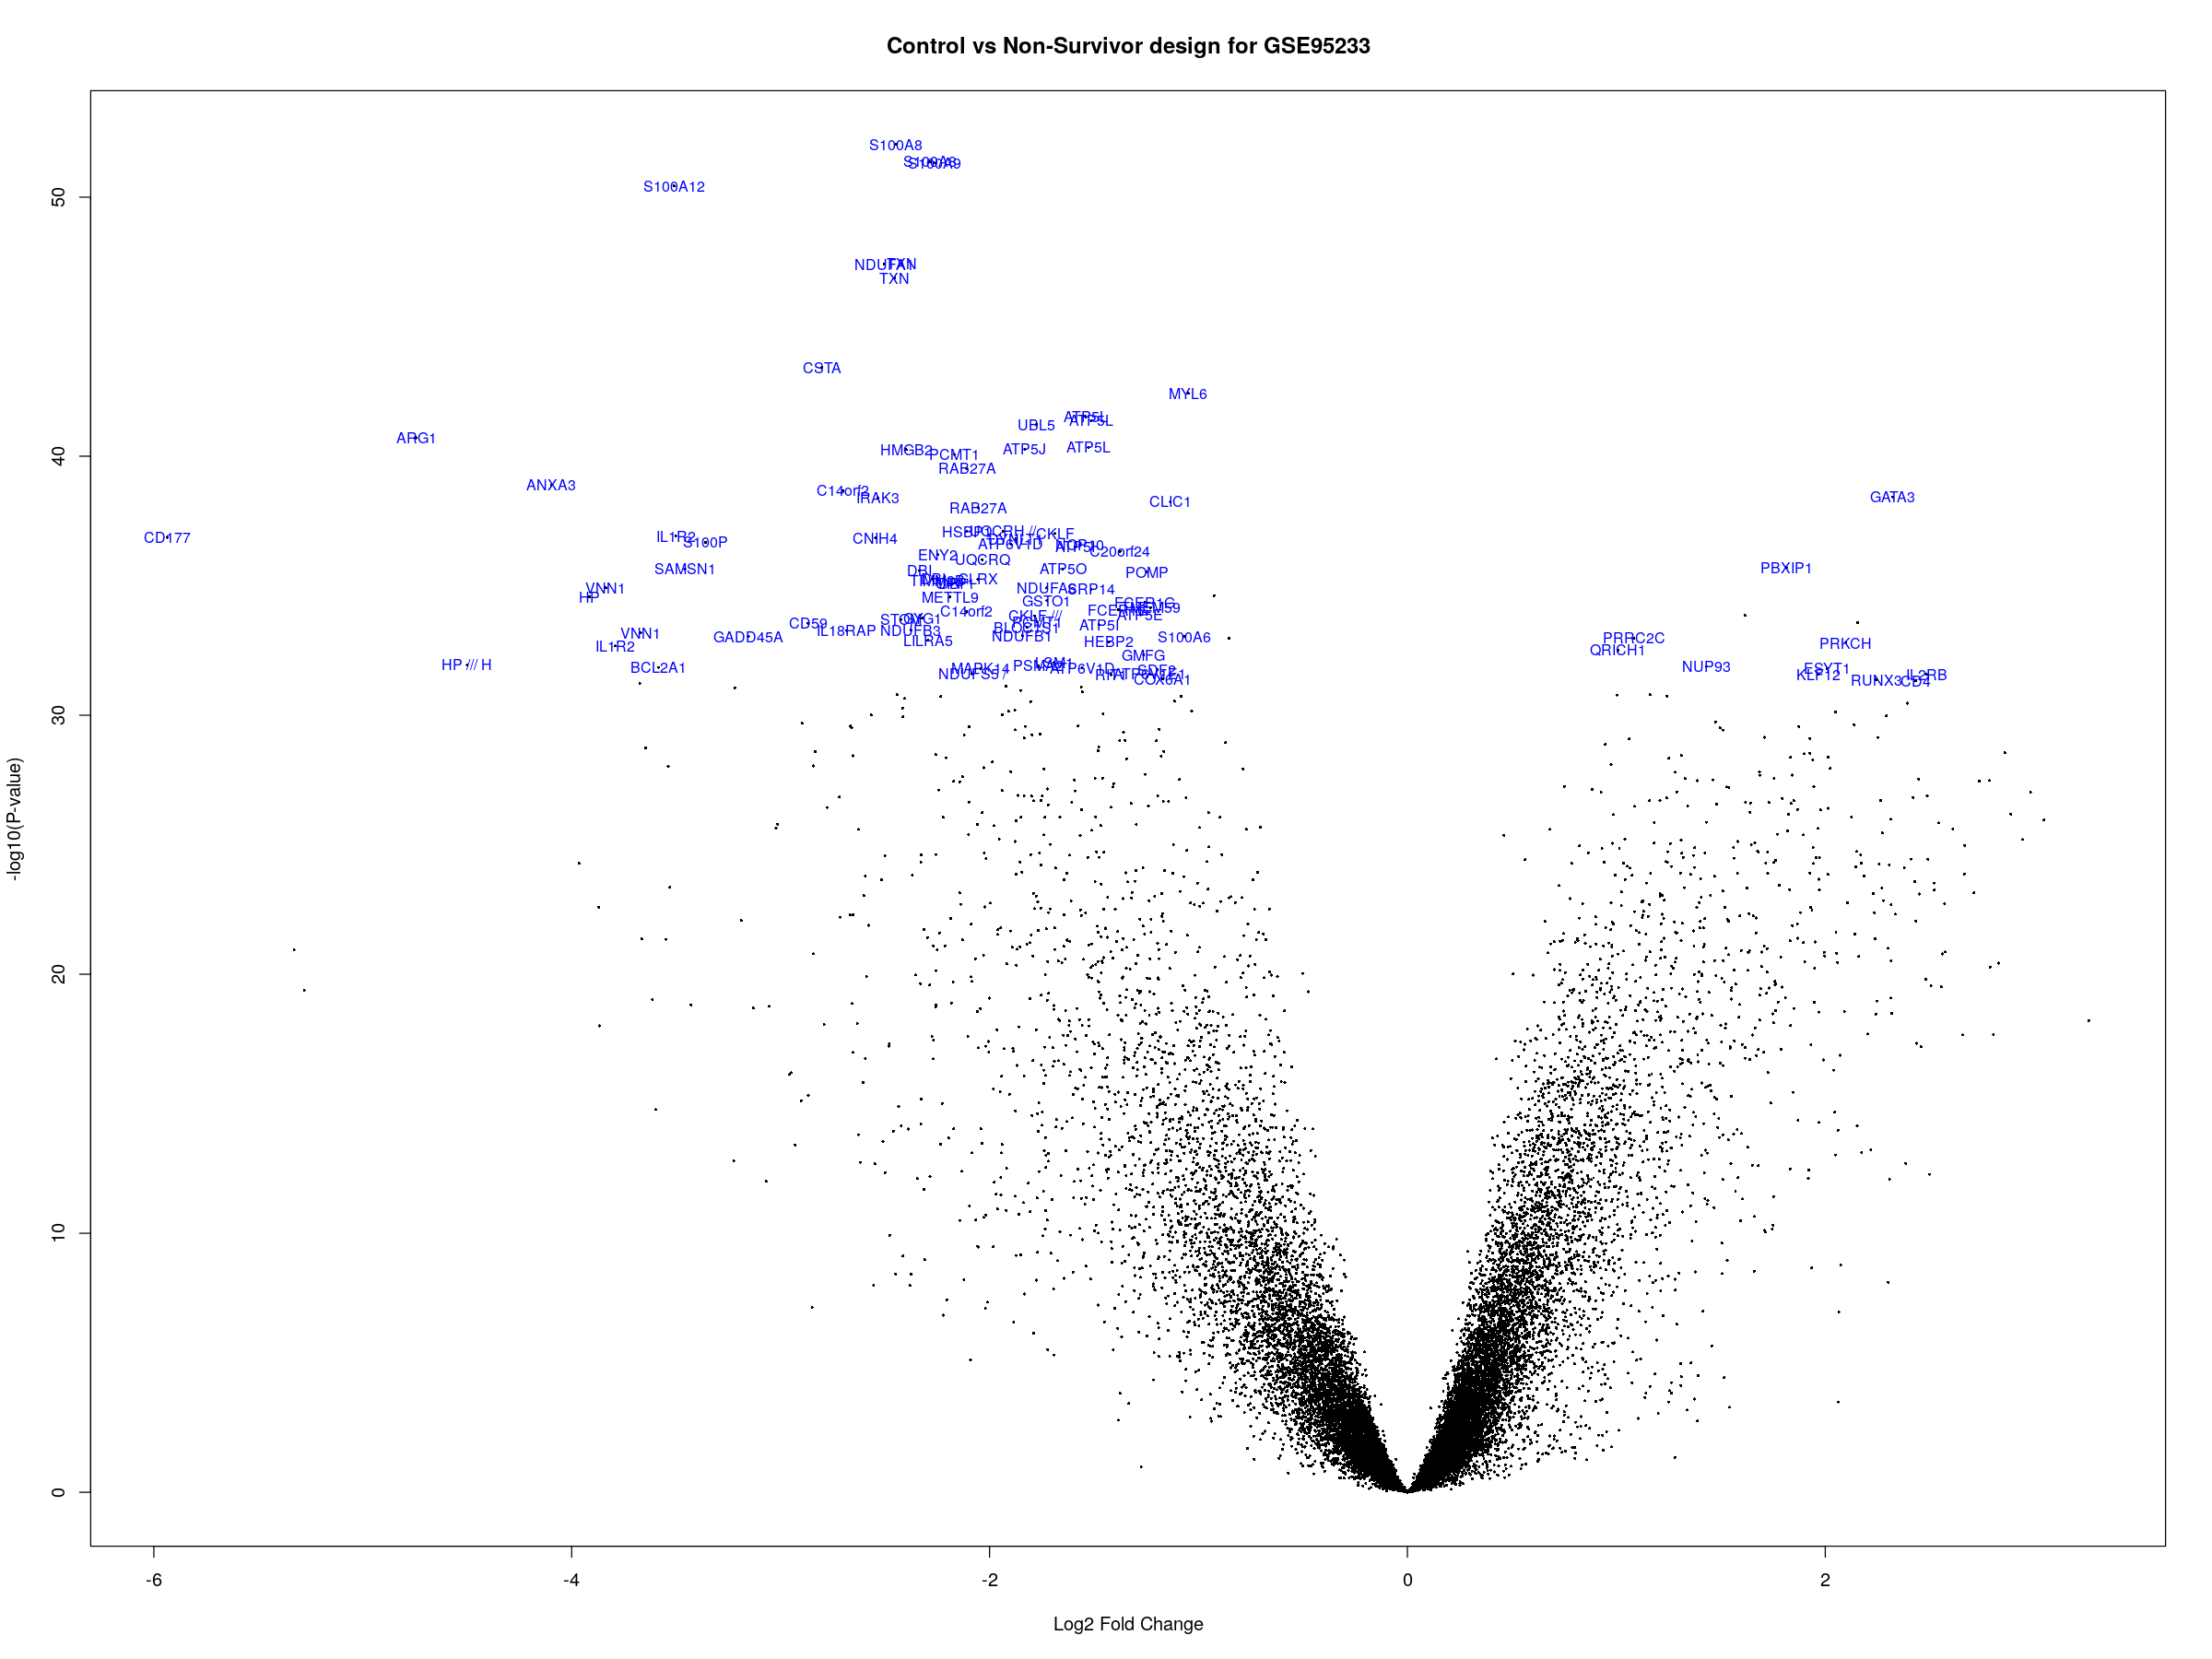

In [ ]:
volcano_names <- ifelse(abs(fit2$coefficients[,1])>=1, fit2$genes$`Gene Symbol`, NA)
             
             
volcanoplot(fit2, coef = 1L, style = "p-value", highlight = 100, 
            names = volcano_names, main=sprintf('Control vs Non-Survivor design for %s', my_id),
            xlab = "Log2 Fold Change", ylab = NULL, pch=16, cex=0.35)

DE expression in **Non_Survivor-Survivor** comparison:

In [ ]:
head(topTable(fit2, coef=2, number=Inf)[,c('Gene.Symbol', 'logFC', 'AveExpr', 't', 'P.Value', 'adj.P.Val', 'B')])

,Gene.Symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
203960_s_at,HSPB11,0.4345658,6.114911,7.299793,2.829434e-11,8.668538e-07,15.16933
215882_at,CEP152,0.3368722,4.716665,6.918150,2.037591e-10,3.121284e-06,13.31750
1568743_at,ATP10A,-0.2762467,4.801112,-6.793804,3.840814e-10,3.357420e-06,12.72308
1557218_s_at,FANCB,0.5567002,2.964703,6.759073,4.580780e-10,3.357420e-06,12.55789
205034_at,CCNE2,0.6625543,4.201019,6.723685,5.479355e-10,3.357420e-06,12.38996
204571_x_at,PIN4,0.4449608,7.452802,6.569215,1.191760e-09,6.085323e-06,11.66162


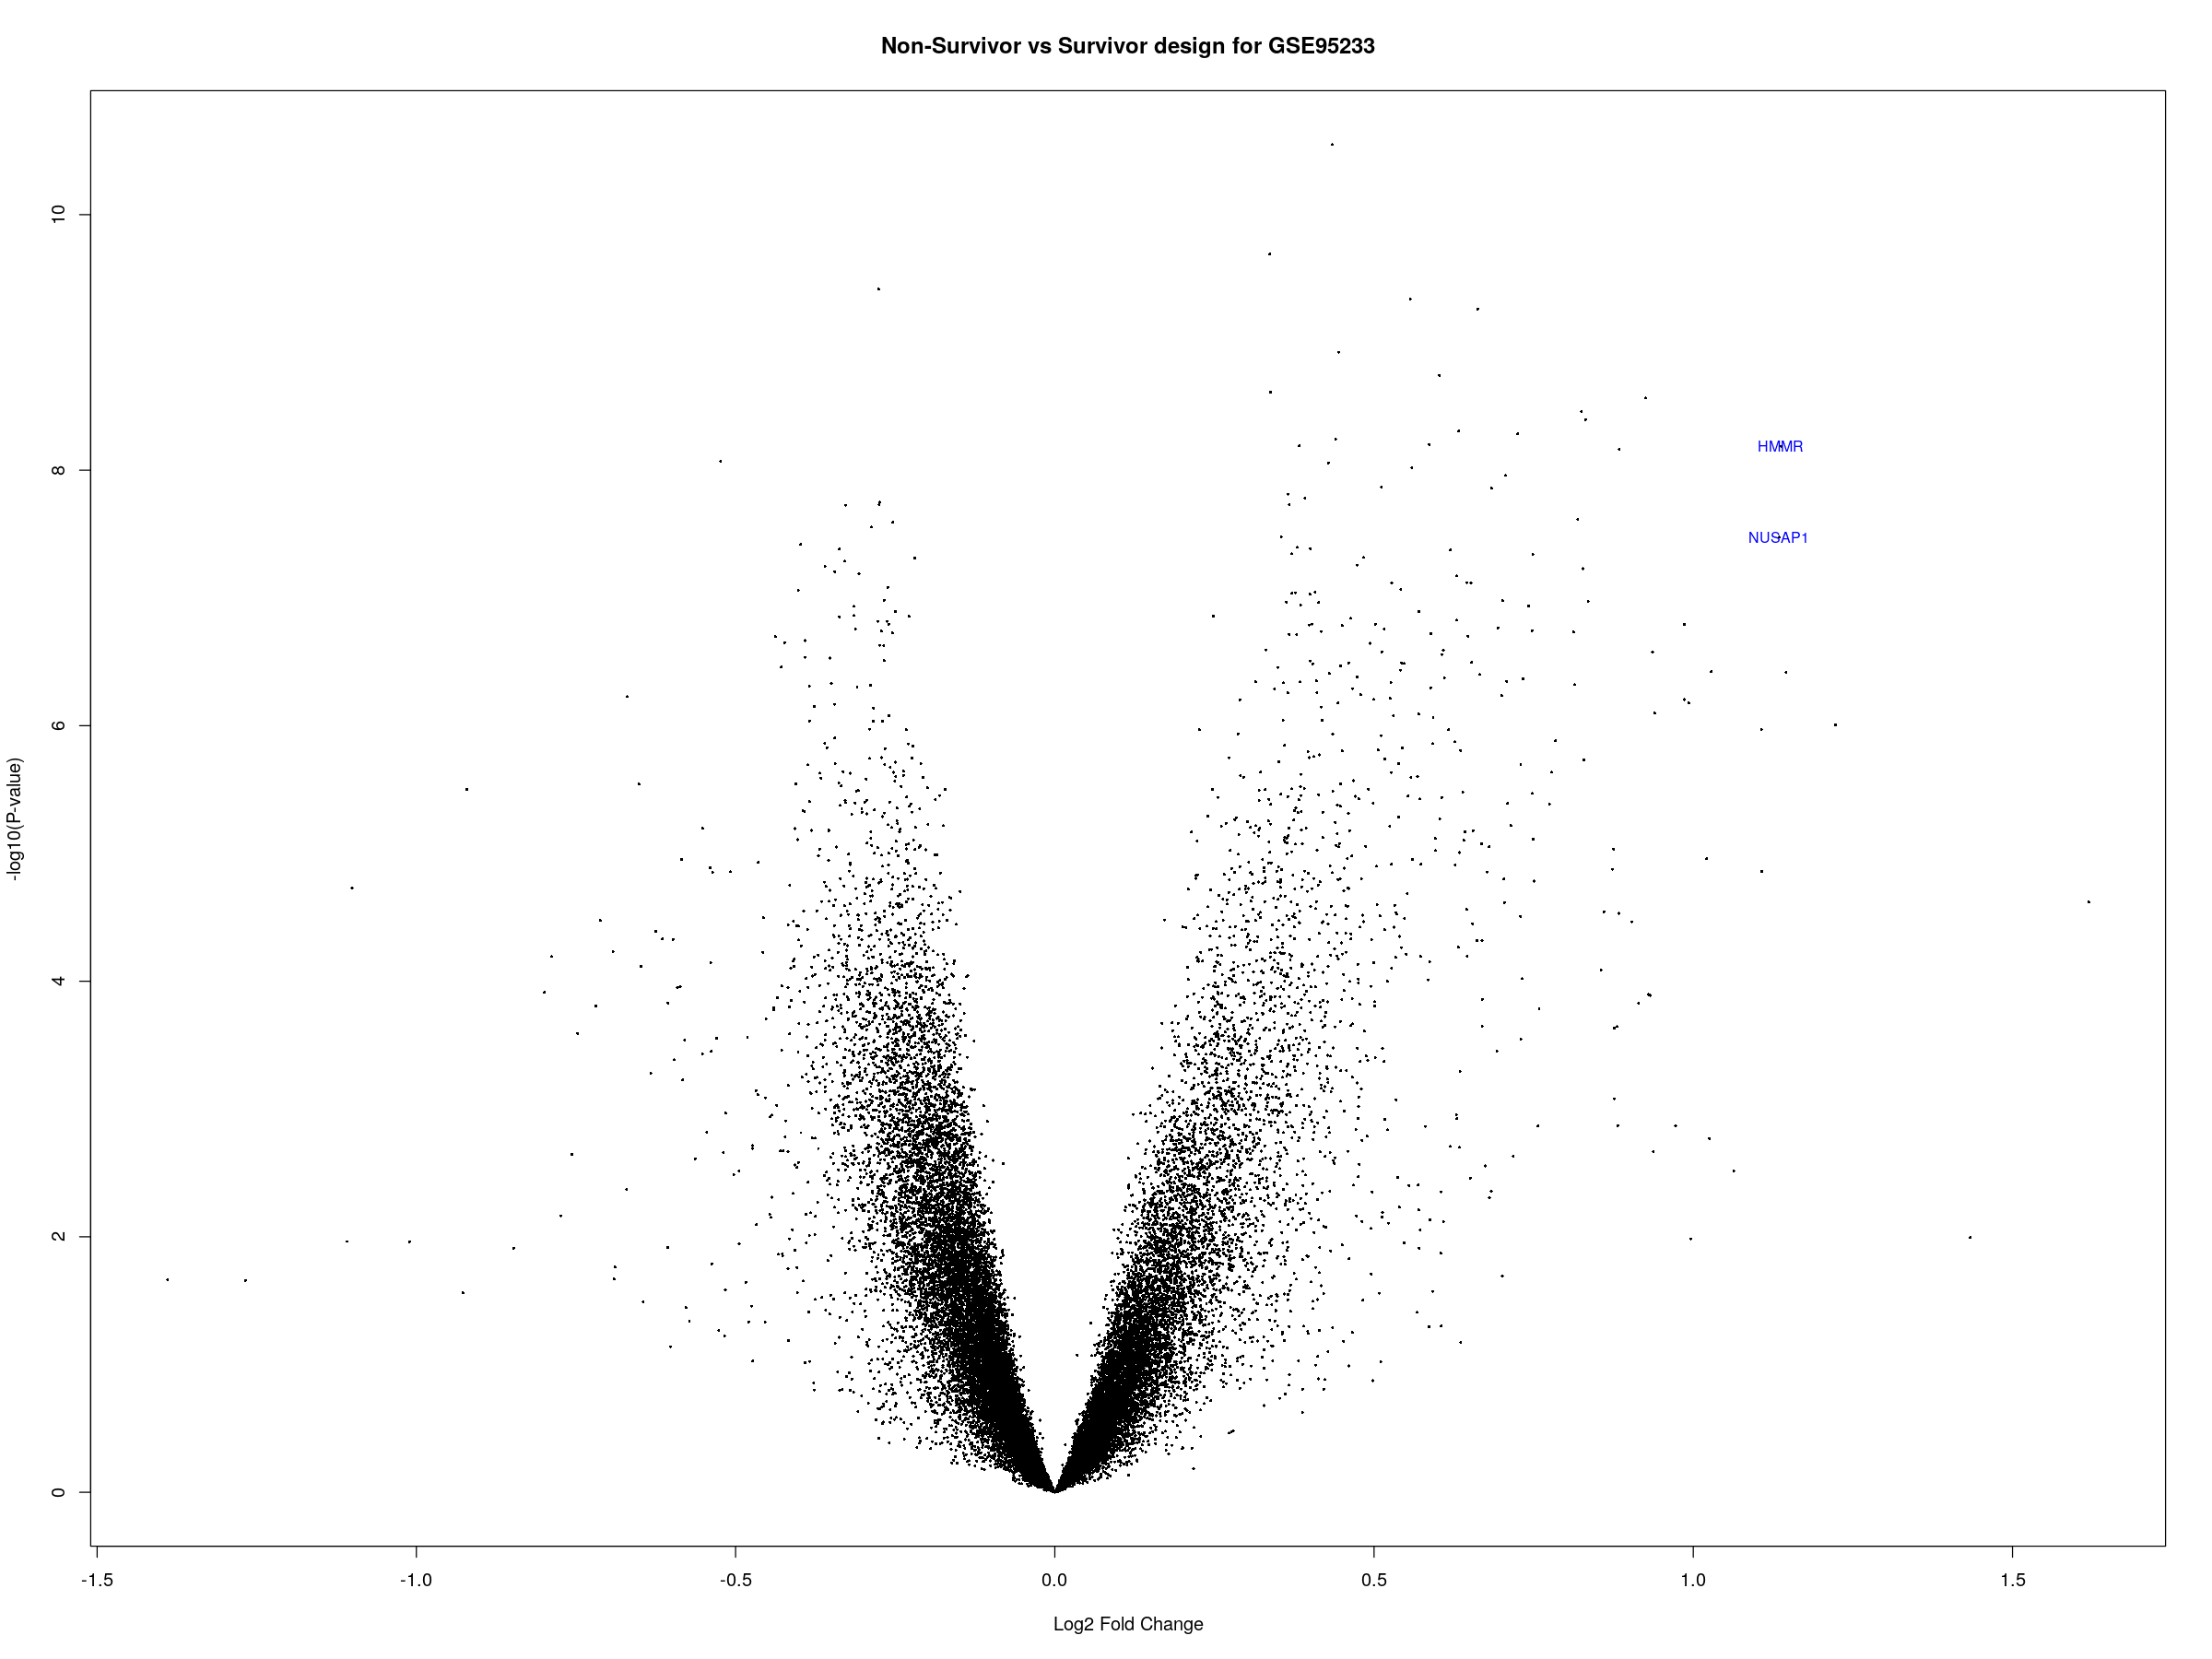

In [ ]:
volcano_names <- ifelse(abs(fit2$coefficients[,2])>=1, fit2$genes$`Gene Symbol`, NA)
             
volcanoplot(fit2, coef = 2L, style = "p-value", highlight = 100, 
            names = volcano_names, main=sprintf('Non-Survivor vs Survivor design for %s', my_id),
            xlab = "Log2 Fold Change", ylab = NULL, pch=16, cex=0.35)

DE expression in **Survivor-Control** comparison:

In [ ]:
head(topTable(fit2, coef=3, number=Inf)[,c('Gene.Symbol', 'logFC', 'AveExpr', 't', 'P.Value', 'adj.P.Val', 'B')])

,Gene.Symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
214370_at,S100A8,2.345189,12.389484,27.89310,7.502266e-56,2.298469e-51,116.39702
205863_at,S100A12,3.390289,11.903669,27.16585,1.316856e-54,2.017226e-50,113.59451
203535_at,S100A9,2.124915,12.344730,26.92383,3.458574e-54,3.532011e-50,112.64927
202917_s_at,S100A8,2.135512,12.888141,26.84619,4.720465e-54,3.615522e-50,112.34470
202298_at,NDUFA1,2.241858,9.364731,23.56295,4.455542e-48,2.730089e-44,98.83833
208864_s_at,TXN,2.118339,9.856243,23.04692,4.330847e-47,2.066113e-43,96.59964


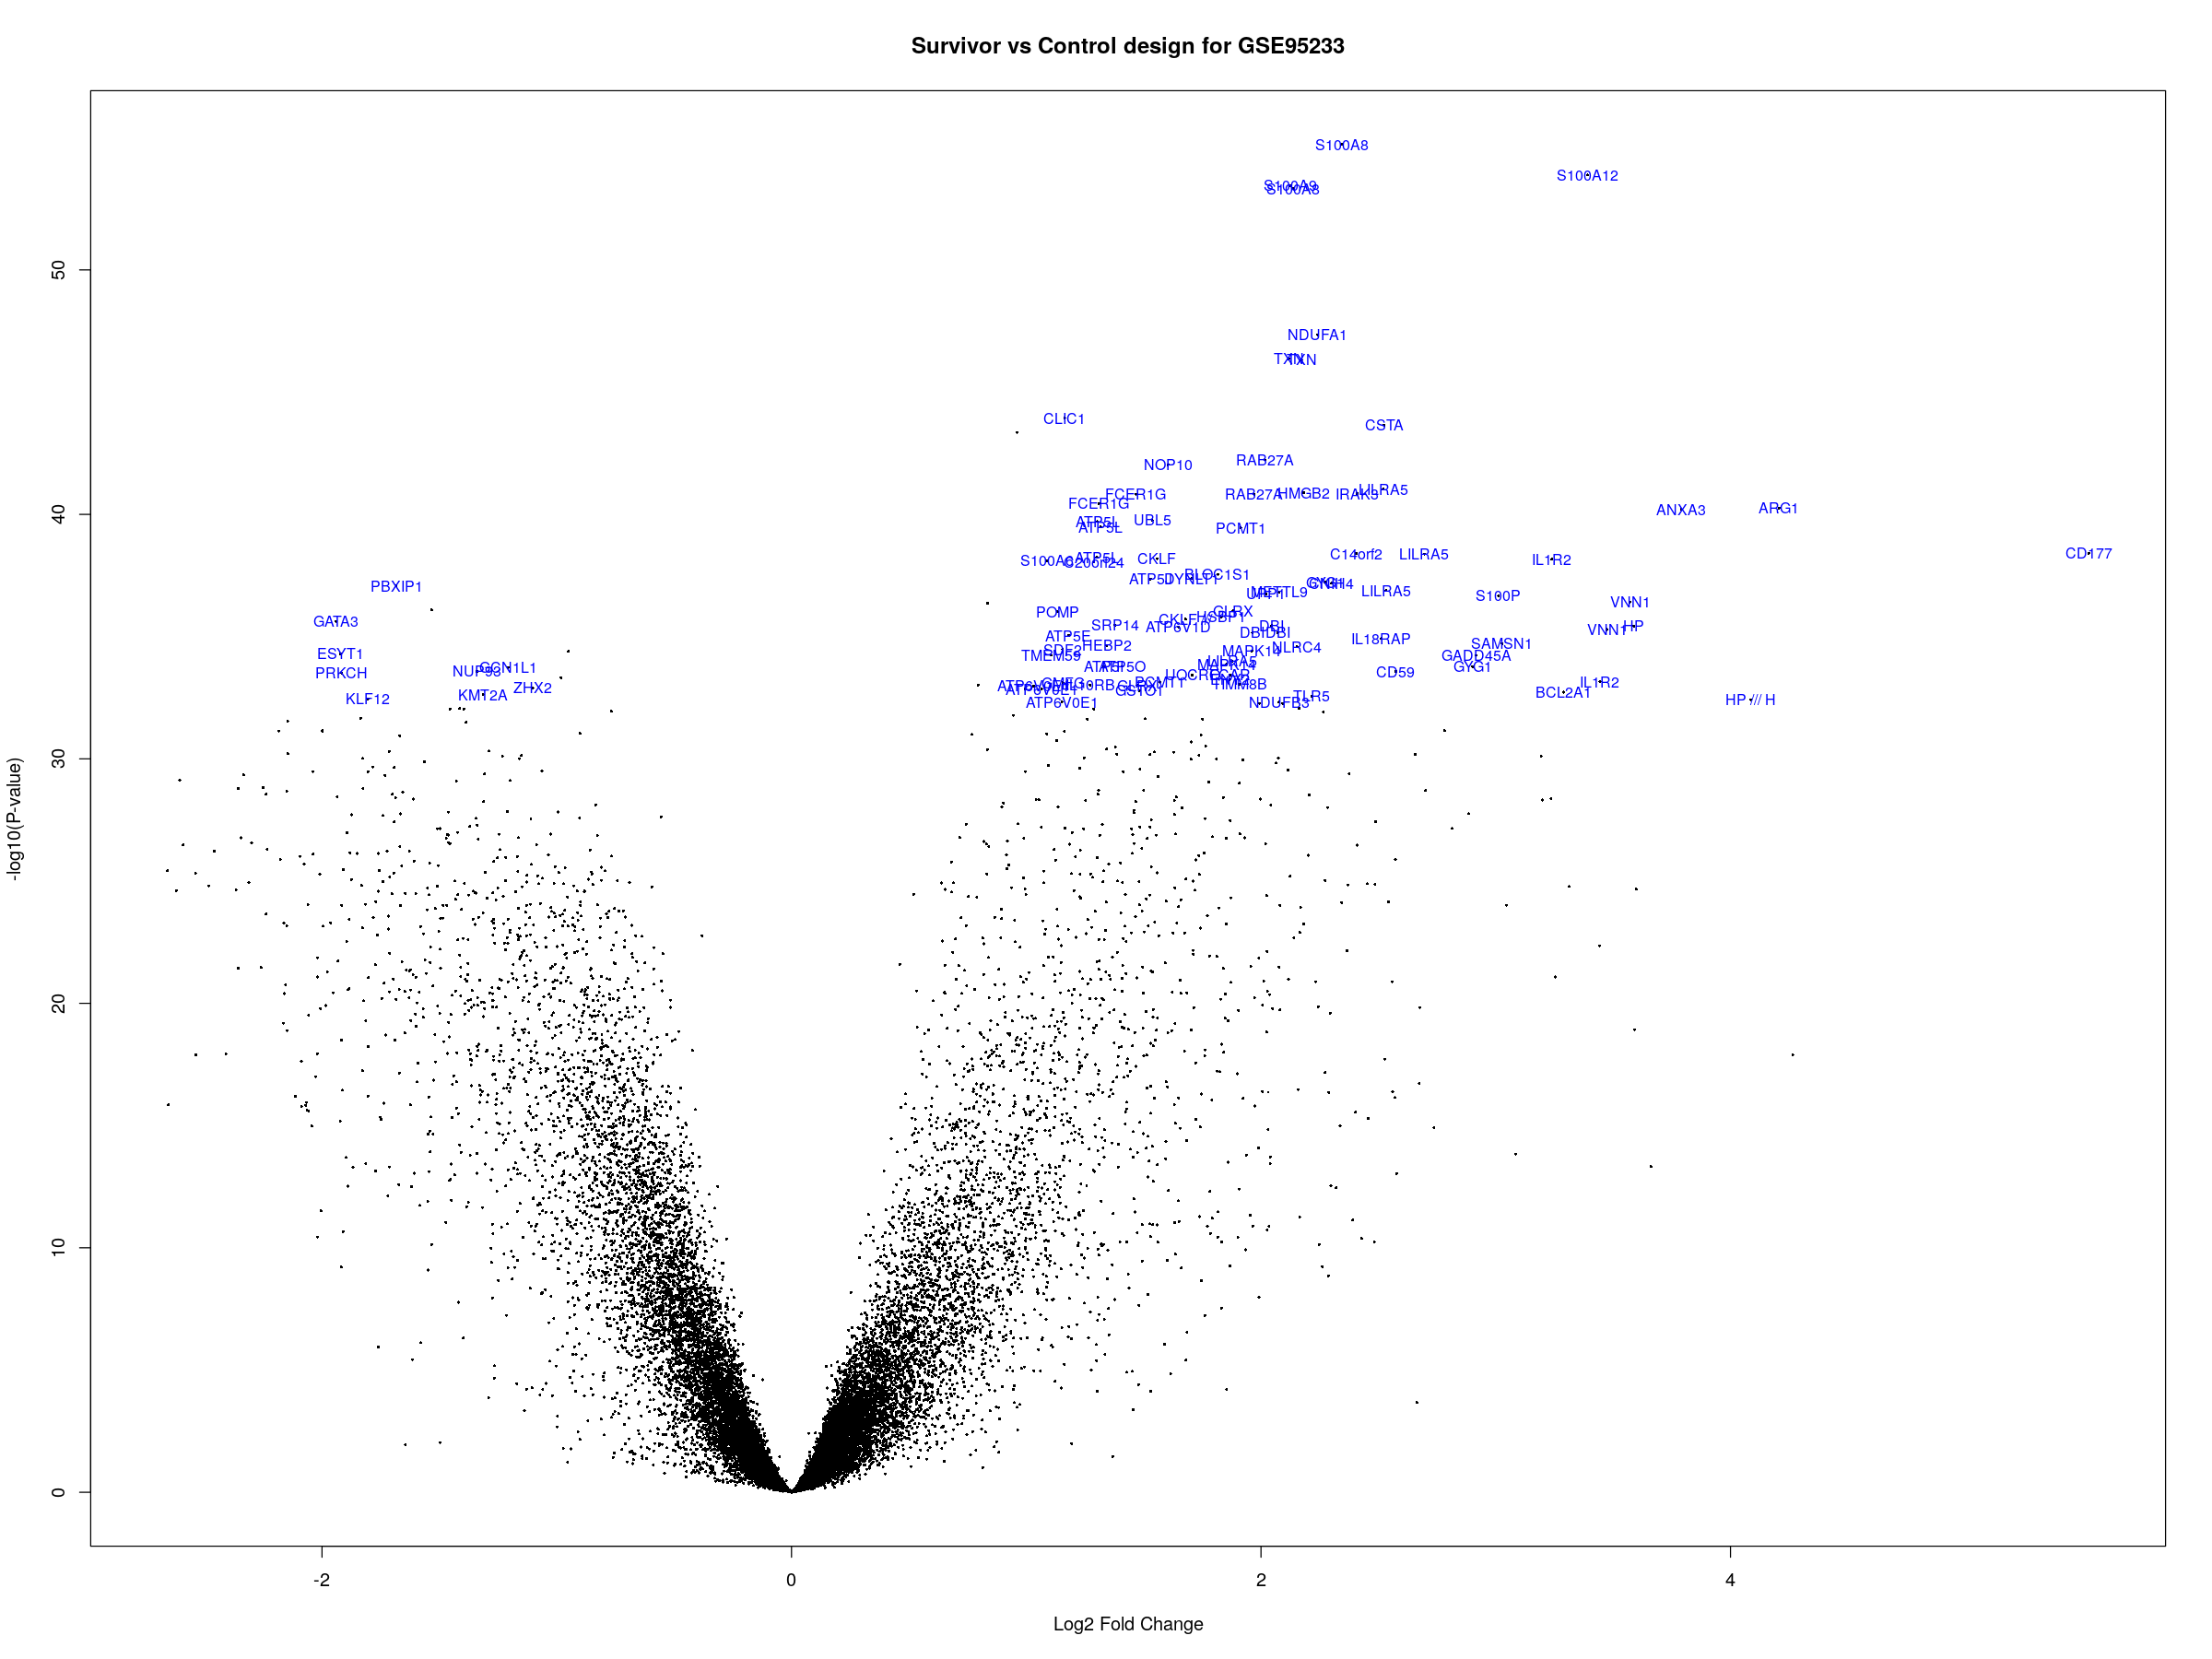

In [ ]:
volcano_names <- ifelse(abs(fit2$coefficients[,3])>=1, fit2$genes$`Gene Symbol`, NA)
             
volcanoplot(fit2, coef = 3L, style = "p-value", highlight = 100, 
            names = volcano_names, main=sprintf('Survivor vs Control design for %s', my_id),
            xlab = "Log2 Fold Change", ylab = NULL, pch=16, cex=0.35)

In [ ]:
# Loading the list of lncRNA genes
lncRNA_genes <- as.vector(read.delim('lncRNA_genes', header=F)[['V1']])

# Creating a folder for the extracted Affymetrix data
cat(sprintf('Every downloaded/processed file will be stored in %s\n\n', paste0(normalizePath('.'), '/lncRNA_affy_data/')))
dir.create('lncRNA_affy_data')

curr_ID <- my_id
cat(sprintf('\n\nProcessing %s..\n\n', curr_ID))

# Downloading data
cat('Downloading the data..\n')
cat(sprintf('The %s data has %d samples and %d probes..\n\n', curr_ID, nrow(exprs(gse)), ncol(exprs(gse))))

# Selecting the columns of interest
cat('Gene pre-filtering..\n')
fdata.cols <- c('ID', 'Target Description', 'Gene Title', 'Gene Symbol', 'ENTREZ_GENE_ID')
selected_fData <- tidyr::drop_na(fData(gse)[,fdata.cols])
cat(sprintf('After filtering NA we have %d probes out of %d..\n', nrow(selected_fData), nrow(fData(gse))))

selected_fData$multi_map <- str_count(selected_fData$`Gene Symbol`, '///')
selected_fData <- selected_fData[order(-selected_fData$multi_map),]
cat(sprintf('Overal we have %d probes that are mapped to multiple genes out of %d..\n\n', sum(selected_fData$multi_map > 1), nrow(selected_fData)))

# Finding indices of lncRNA gene probes
cat('Extracting lncRNA genes..\n')
idx <- which(sapply(selected_fData$`Gene Symbol`, function(x) length(intersect(lncRNA_genes, x))) > 0)

lncRNA_fData <- selected_fData[idx,]
lncRNA_exprs <- exprs(gse)[rownames(lncRNA_fData),]
lncRNA_pData <- pData(gse)

cat(sprintf('Overall we find %d probe IDs that correspond to lncRNA genes out of %d..\n', nrow(lncRNA_fData), nrow(selected_fData)))

cat(sprintf('lncRNA_fData (%d x %d):\n', nrow(lncRNA_fData), ncol(lncRNA_fData)))
cat(sprintf('lncRNA_pData (%d x %d):\n', nrow(lncRNA_pData), ncol(lncRNA_pData)))
cat(sprintf('lncRNA_exprs (%d x %d):\n\n', nrow(lncRNA_exprs), ncol(lncRNA_exprs)))

cat('Saving..\n')
write.table(lncRNA_pData, file=paste0('lncRNA_affy_data/', curr_ID, '_pData.tsv'), quote=F, sep='\t', col.names=T, row.names=T)
write.table(lncRNA_fData, file=paste0('lncRNA_affy_data/', curr_ID, '_fData.tsv'), quote=F, sep='\t', col.names=T, row.names=T)
write.table(lncRNA_exprs, file=paste0('lncRNA_affy_data/', curr_ID, '_exprs.tsv'), quote=F, sep='\t', col.names=T, row.names=T)

Every downloaded/processed file will be stored in /home/maximkryukov/joseph/lncRNA_affy_data/



Warning message in dir.create("lncRNA_affy_data"):
“'lncRNA_affy_data' already exists”




Processing GSE95233..

The GSE95233 data has 30637 samples and 124 probes..

Gene pre-filtering..
After filtering NA we have 30637 probes out of 30637..
Overal we have 463 probes that are mapped to multiple genes out of 30637..

Extracting lncRNA genes..
Overall we find 875 probe IDs that correspond to lncRNA genes out of 30637..
lncRNA_fData (875 x 6):
lncRNA_pData (124 x 39):
lncRNA_exprs (875 x 124):

Saving..


### EXTRA

**Gene Annotations for Microarray Probesets**

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("hgu133plus2.db")

In [ ]:


library (hgu133plus2.db)
columns(hgu133plus2.db)



[1] "ACCNUM"       "ALIAS"        "ENSEMBL"      "ENSEMBLPROT"  "ENSEMBLTRANS"
 [6] "ENTREZID"     "ENZYME"       "EVIDENCE"     "EVIDENCEALL"  "GENENAME"    
[11] "GENETYPE"     "GO"           "GOALL"        "IPI"          "MAP"         
[16] "OMIM"         "ONTOLOGY"     "ONTOLOGYALL"  "PATH"         "PFAM"        
[21] "PMID"         "PROBEID"      "PROSITE"      "REFSEQ"       "SYMBOL"      
[26] "UCSCKG"       "UNIPROT"

In [ ]:


keytypes(hgu133plus2.db)



[1] "ACCNUM"       "ALIAS"        "ENSEMBL"      "ENSEMBLPROT"  "ENSEMBLTRANS"
 [6] "ENTREZID"     "ENZYME"       "EVIDENCE"     "EVIDENCEALL"  "GENENAME"    
[11] "GENETYPE"     "GO"           "GOALL"        "IPI"          "MAP"         
[16] "OMIM"         "ONTOLOGY"     "ONTOLOGYALL"  "PATH"         "PFAM"        
[21] "PMID"         "PROBEID"      "PROSITE"      "REFSEQ"       "SYMBOL"      
[26] "UCSCKG"       "UNIPROT"

In [ ]:


gene.data <- select(hgu133plus2.db, keys=rownames(contrast.tts[["ControlvsSepsis=Control-Sepsis"]]), keytype="PROBEID", columns=c("ENTREZID", "GENENAME", "SYMBOL"))
head(gene.data)



ERROR: ignored

#Materials from my RStudio

In [ ]:
##Take a look on the expression value
summary(exprs(gse))  # MK - the summary is too verbose, plots are better

#Remove batch effect  # MK - you cannot remove batch effects - you have only one sample per phenotype
y <- matrix(rnorm(10*9),10,9)
y[,1:3] <- y[,1:3] + 5
batch <- c("A","A","A","B","B","B","C","C","C")
y2 <- removeBatchEffect(y, batch)
par(mfrow=c(1,2))
boxplot(as.data.frame(y),main="Original")
boxplot(as.data.frame(y2),main="Batch corrected")

## MK - The data is already normalized!
## Check - https://www.biostars.org/p/395494/

##From this output we can see that the values are below 16 which is good, 
#if not we would have perform a log2 transformation.
#exprs(gse) <- log2(exprs(gse))

##Check the summary again
#summary(exprs(gse))
#boxplot(exprs(gse),outline=F)

##Inspect the Clinical Variables
##Let's pick just those columns that seem to contain factors we might 
#need for the analysis.
library(dplyr)
sampleInfo <- pData(gse)
head(sampleInfo)
table(sampleInfo$characteristics_ch1.3)

#Sample clustering and Principal Components Analysis
## argument use="c" stops an error if there are any missing data points
corMatrix <- cor(exprs(gse),use="c")
pheatmap(corMatrix)   

## Print the rownames of the sample information and check it matches the correlation matrix
rownames(sampleInfo)
colnames(corMatrix)

## If not, force the rownames to match the columns
#rownames(sampleInfo) <- colnames(corMatrix)
#pheatmap(corMatrix, annotation_col= sampleInfo)

#Differential expression analysis

## calculate median expression level
cutoff <- median(exprs(gse))

## TRUE or FALSE for whether each gene is "expressed" in each sample
is_expressed <- exprs(gse) > cutoff

## Identify genes expressed in more than 2 samples
keep <- rowSums(is_expressed) > 3

## check how many genes are removed / retained.
table(keep)

## subset to just those expressed genes
gse <- gse[keep,]

#Design matrix
design <- model.matrix(~0 + sampleInfo$characteristics_ch1.3)
head(design)
design


fit <- eBayes(fit)

#Getting 

Enrichment analysis via reactomePA



